In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stat
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [65]:
df= pd.read_csv('train (4).csv')

In [66]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Lets check for the mean, standard deviation for Sales price

<Axes: >

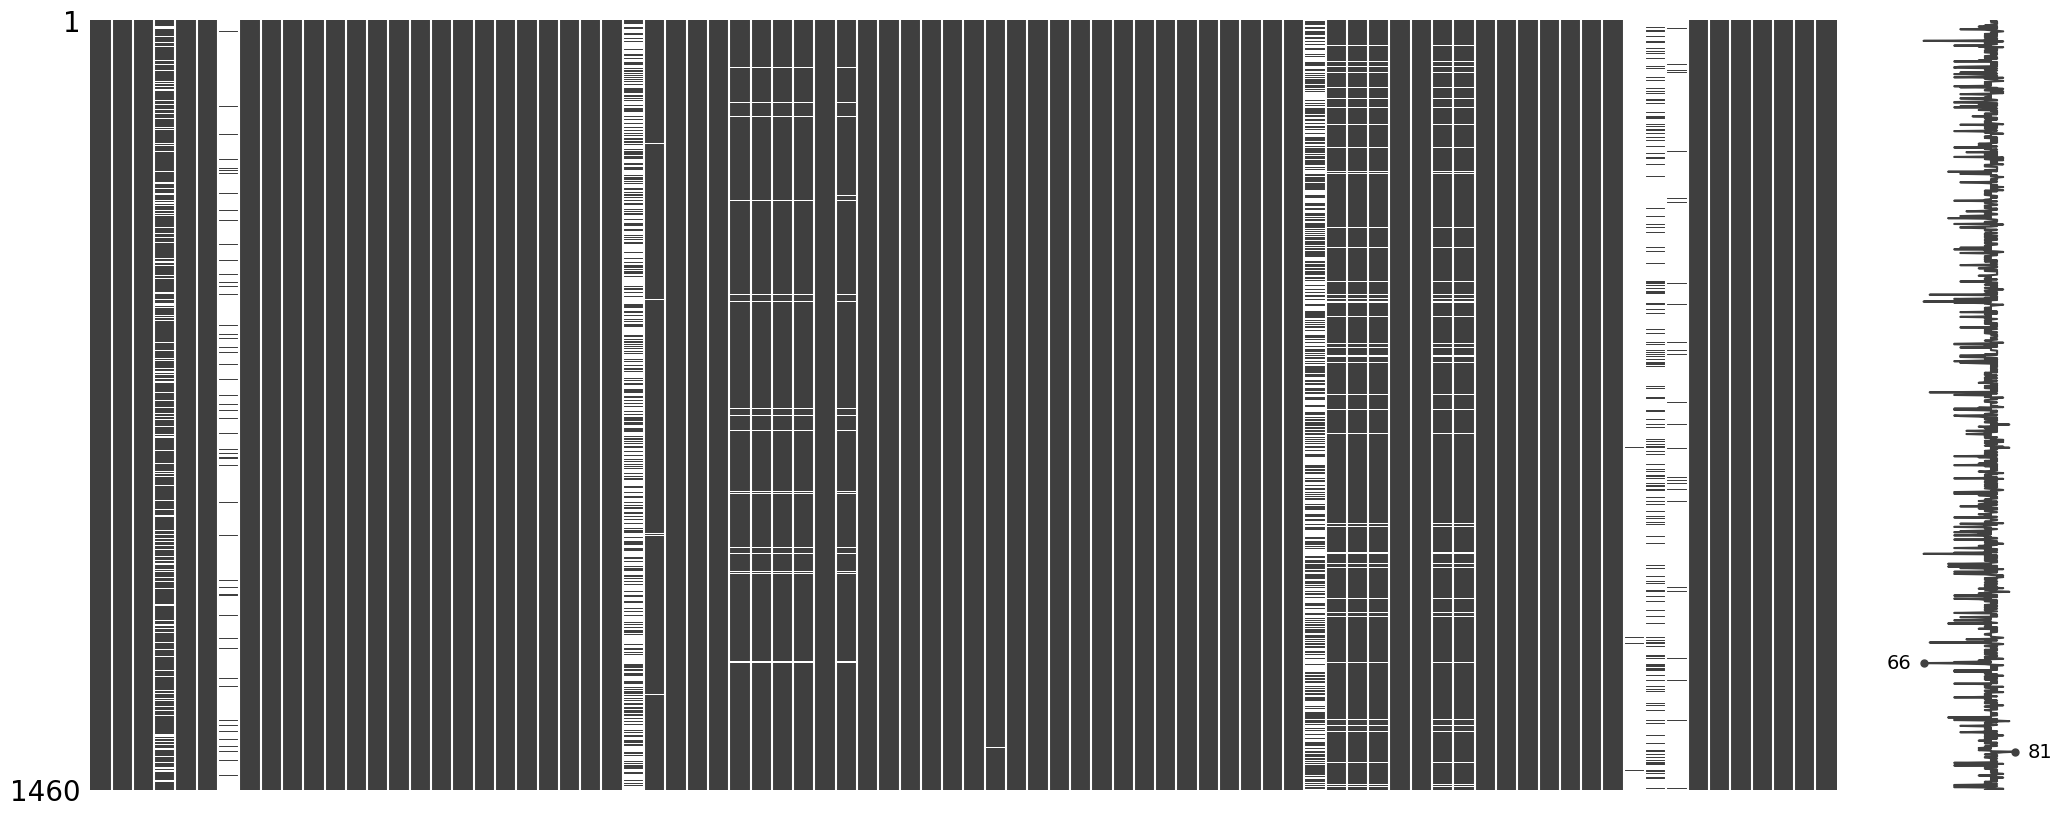

In [86]:
msno.matrix(df)

<Axes: >

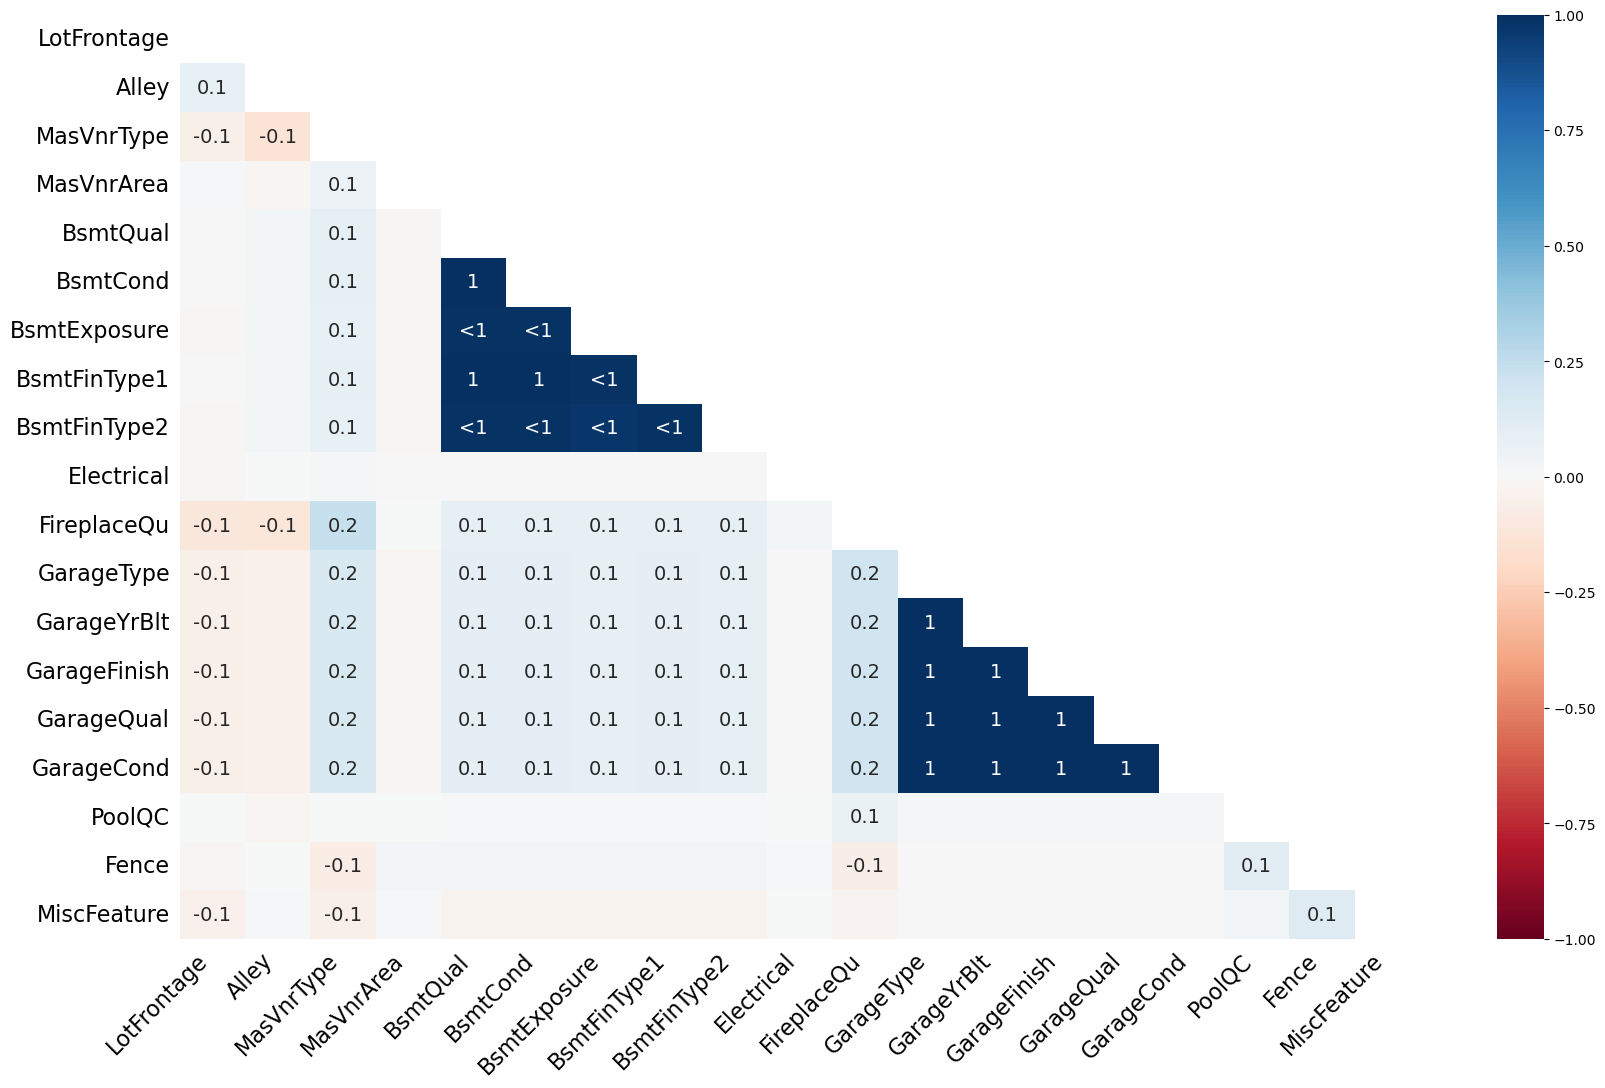

In [87]:
msno.heatmap(df)

In [69]:
df['SalePrice'].describe()

count      1452.000000
mean     180036.434573
std       76544.667390
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      213625.000000
max      625000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


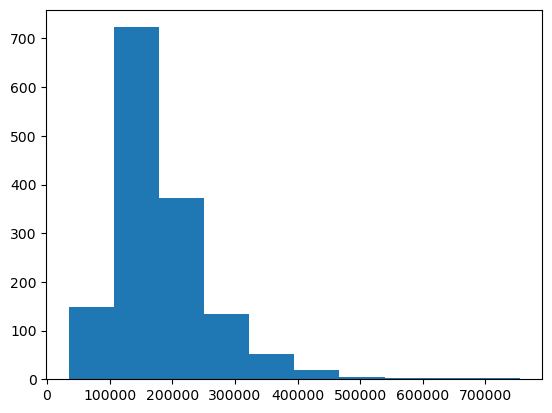

Skew is: 0.12134661989685333


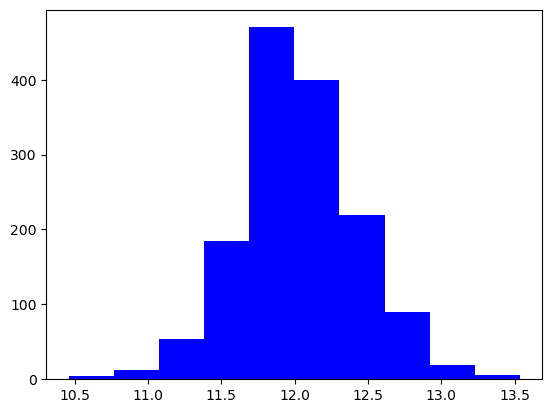

In [70]:
# Determining the Skewness of data 
print ("Skew is:", df['SalePrice'].skew())

plt.hist(df['SalePrice'])
plt.show()

# After log transformation of the data it looks much more center aligned
df['Skewed_SP'] = np.log(df['SalePrice']+1)
print ("Skew is:", df['Skewed_SP'].skew())
plt.hist(df['Skewed_SP'], color='blue')
plt.show()

In [72]:
df['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

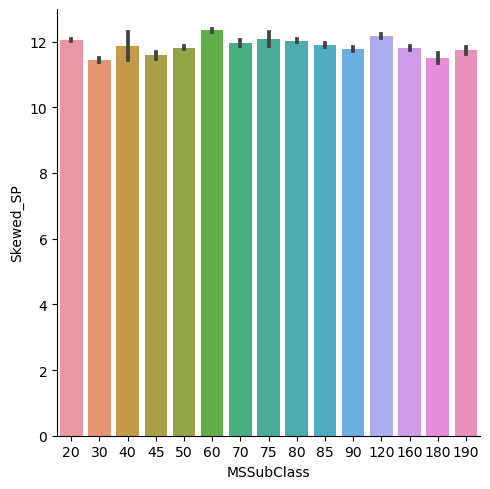

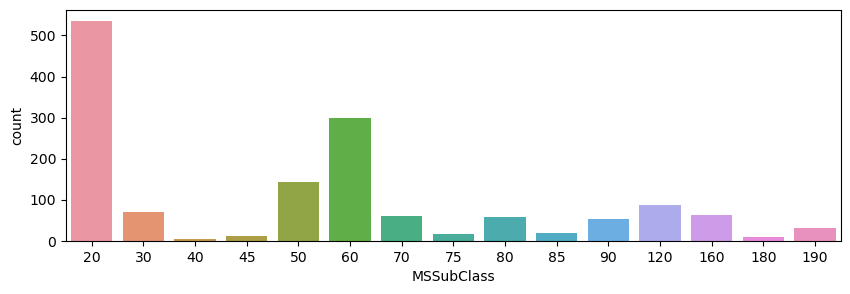

In [75]:
sns.catplot(x='MSSubClass', y='Skewed_SP',data=df,kind='bar')
plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSSubClass', data=df)
plt.show()

In [76]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

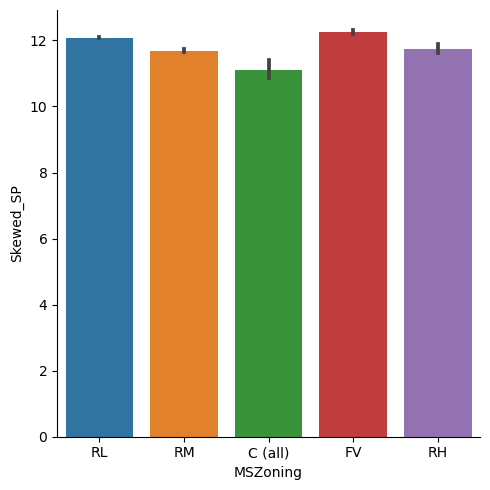

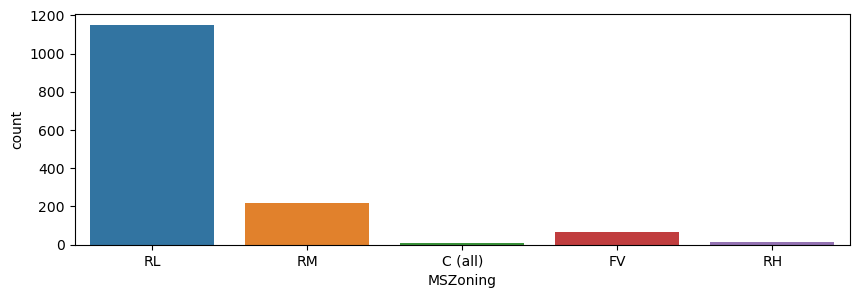

In [77]:
sns.catplot(x='MSZoning',y= 'Skewed_SP', data=df,kind='bar')
plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=df)
plt.show()

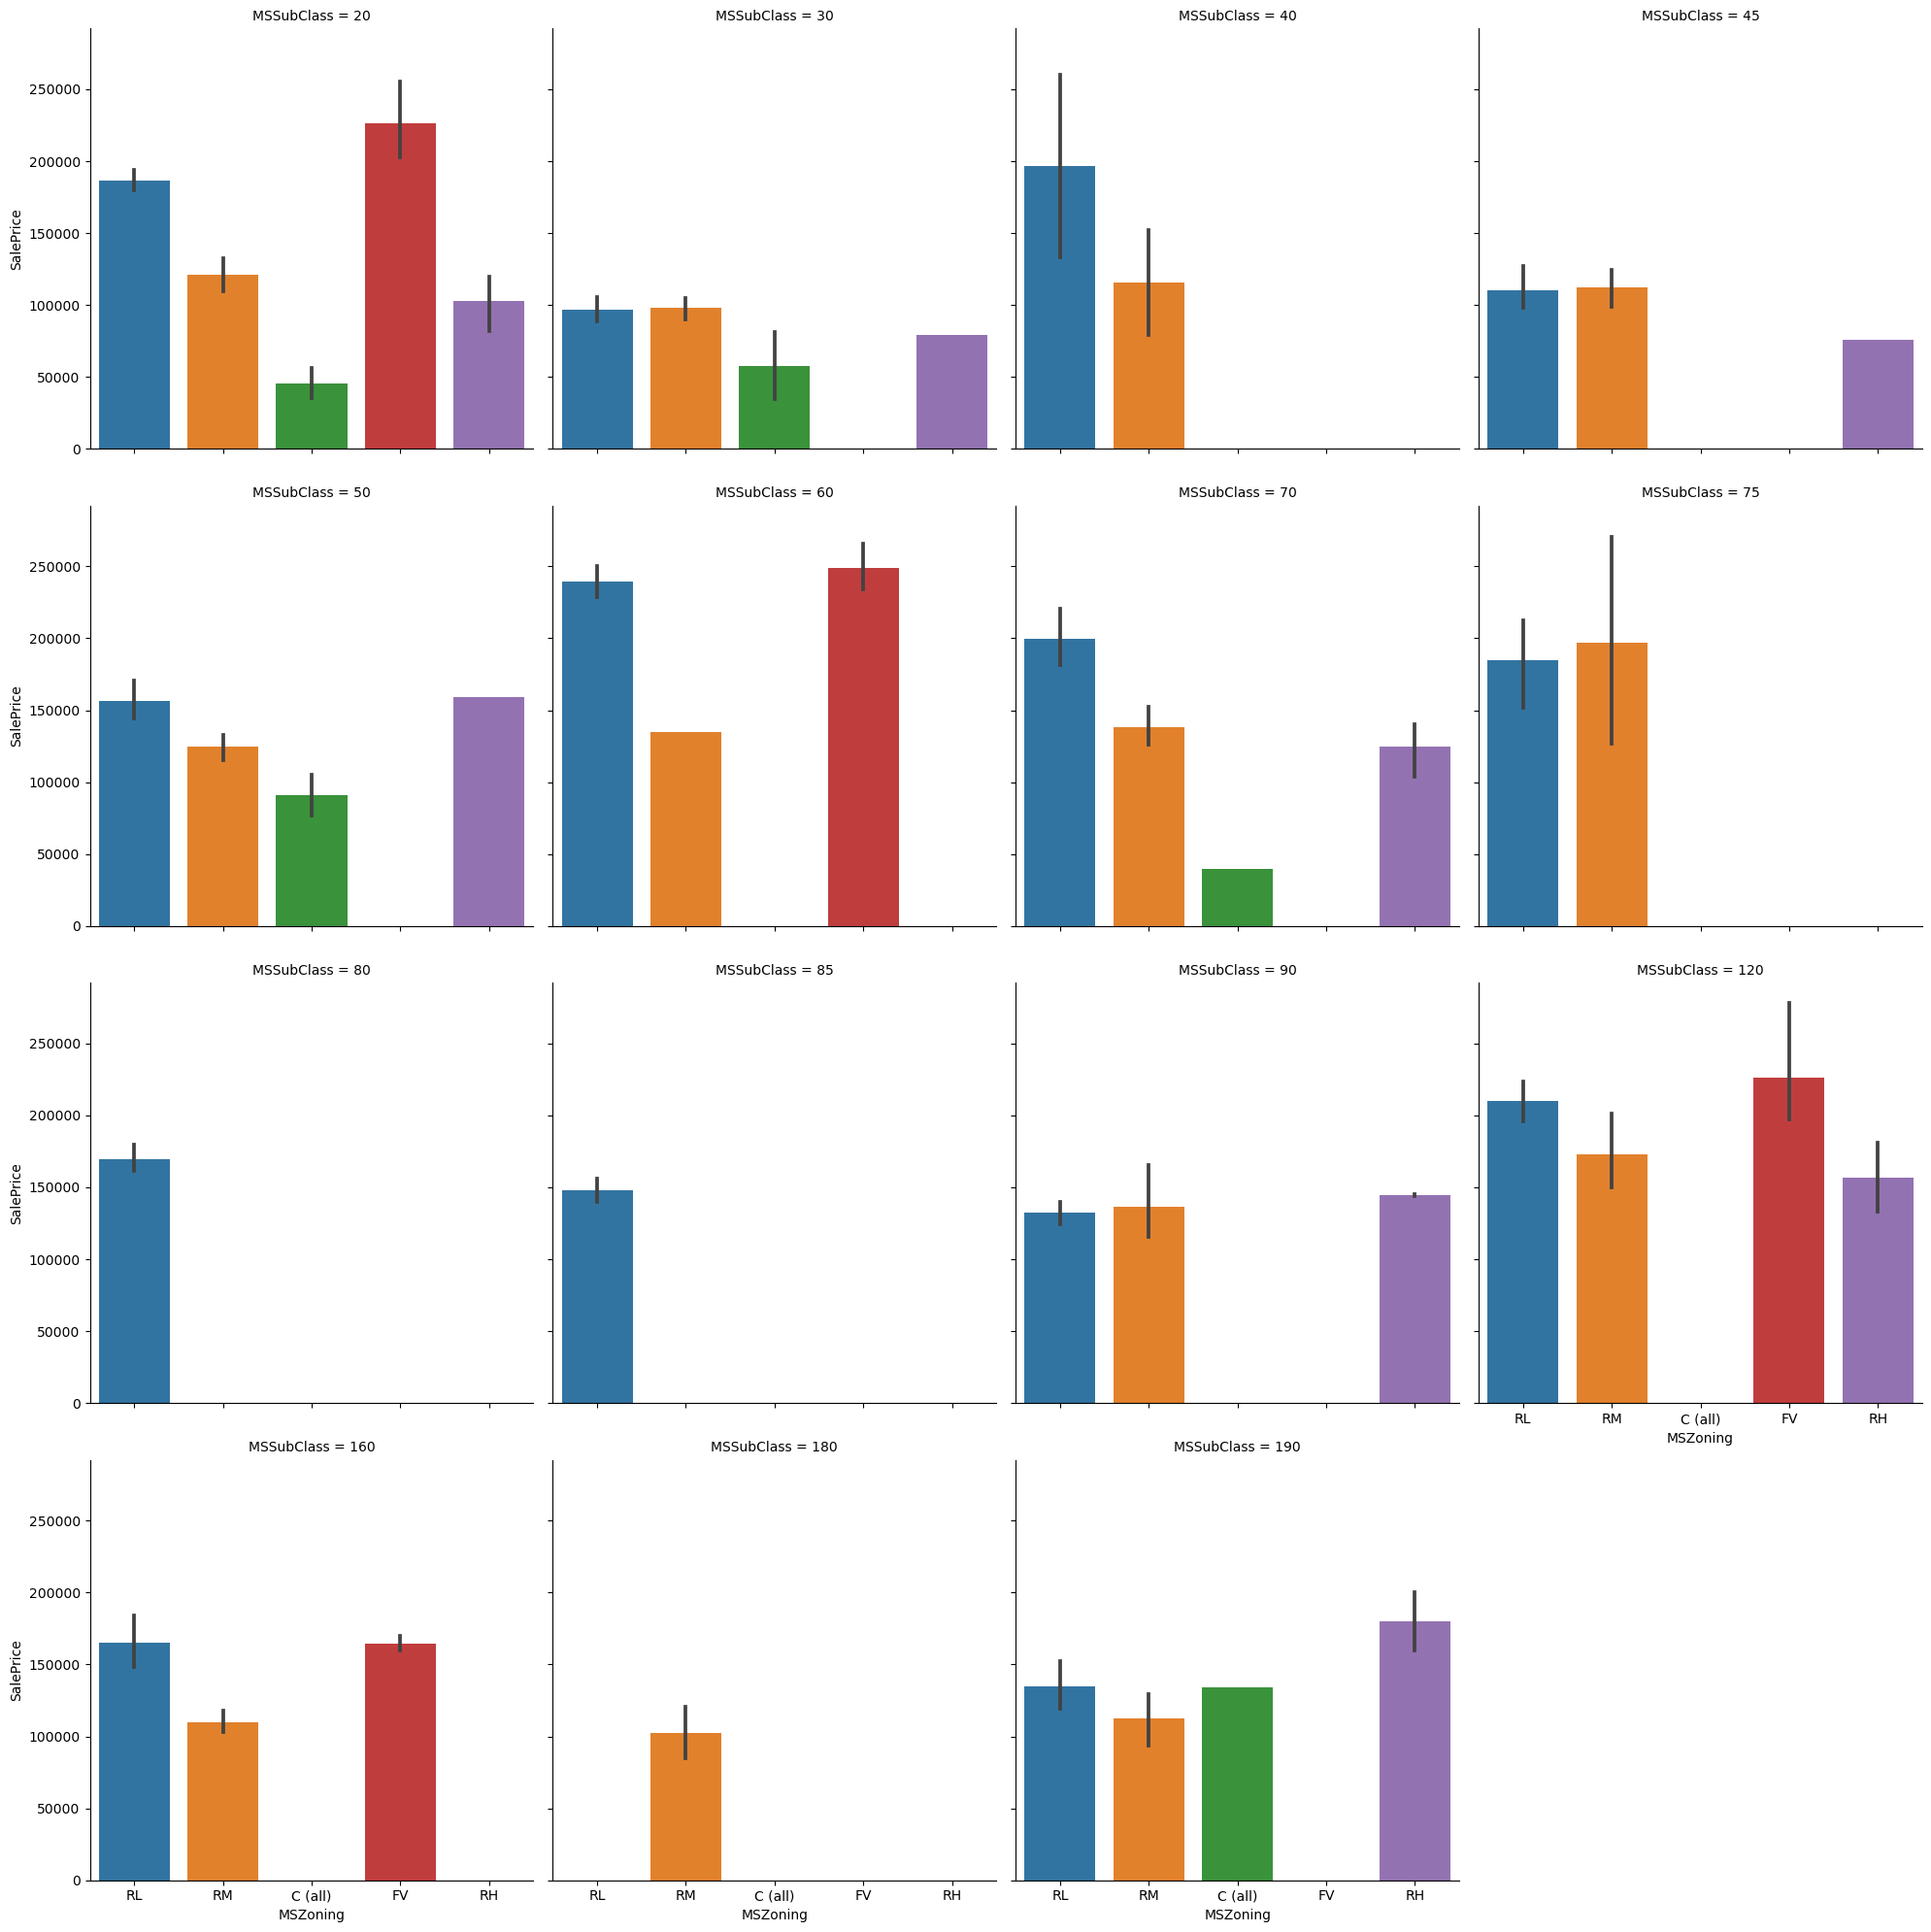

In [80]:
sns.catplot(x='MSZoning',y='SalePrice',col='MSSubClass',data=df,kind='bar',col_wrap=4)
plt.show()

Lets analyze the numeric features using the numpy library

In [90]:
df=df.drop('Id',axis=1)

In [96]:
num_col = df.select_dtypes([int,float])


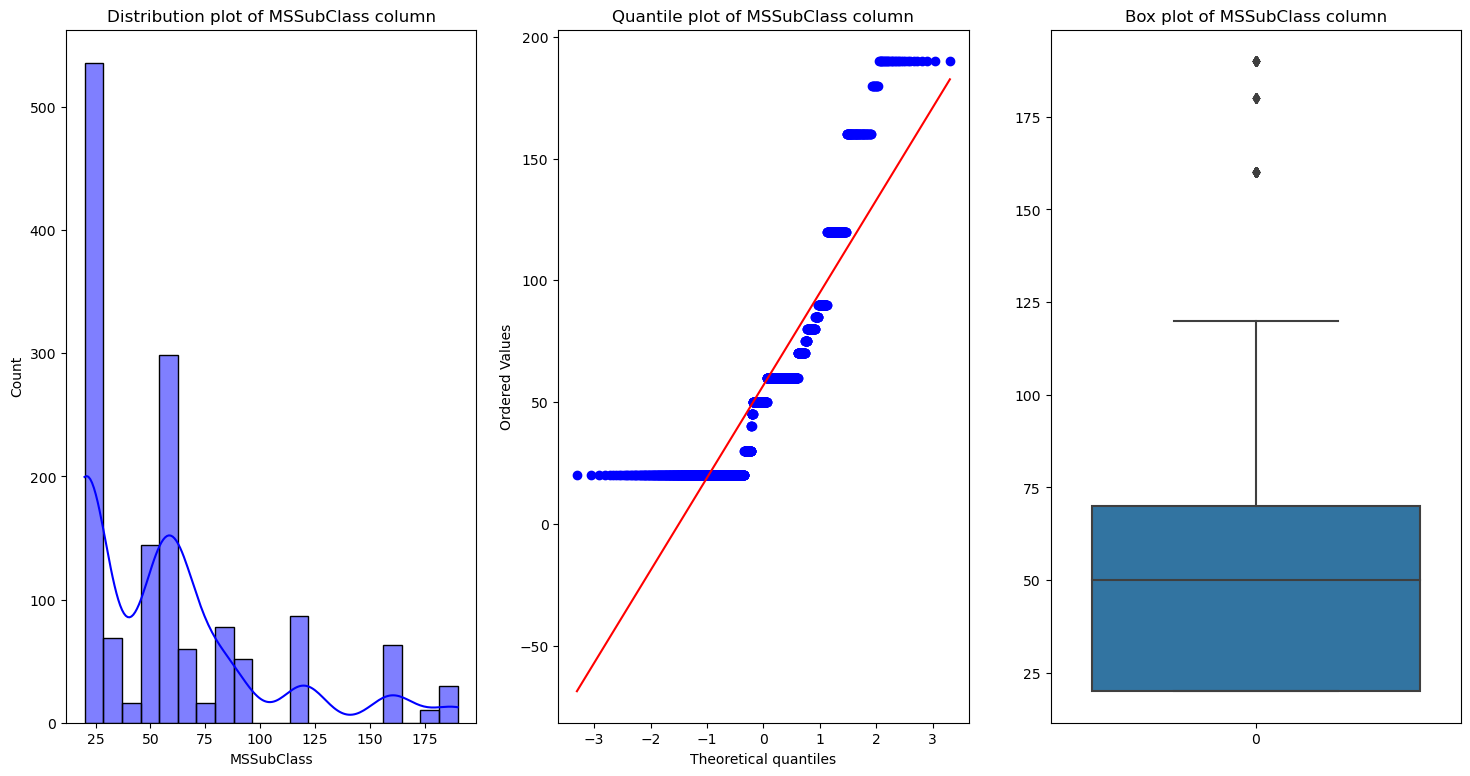

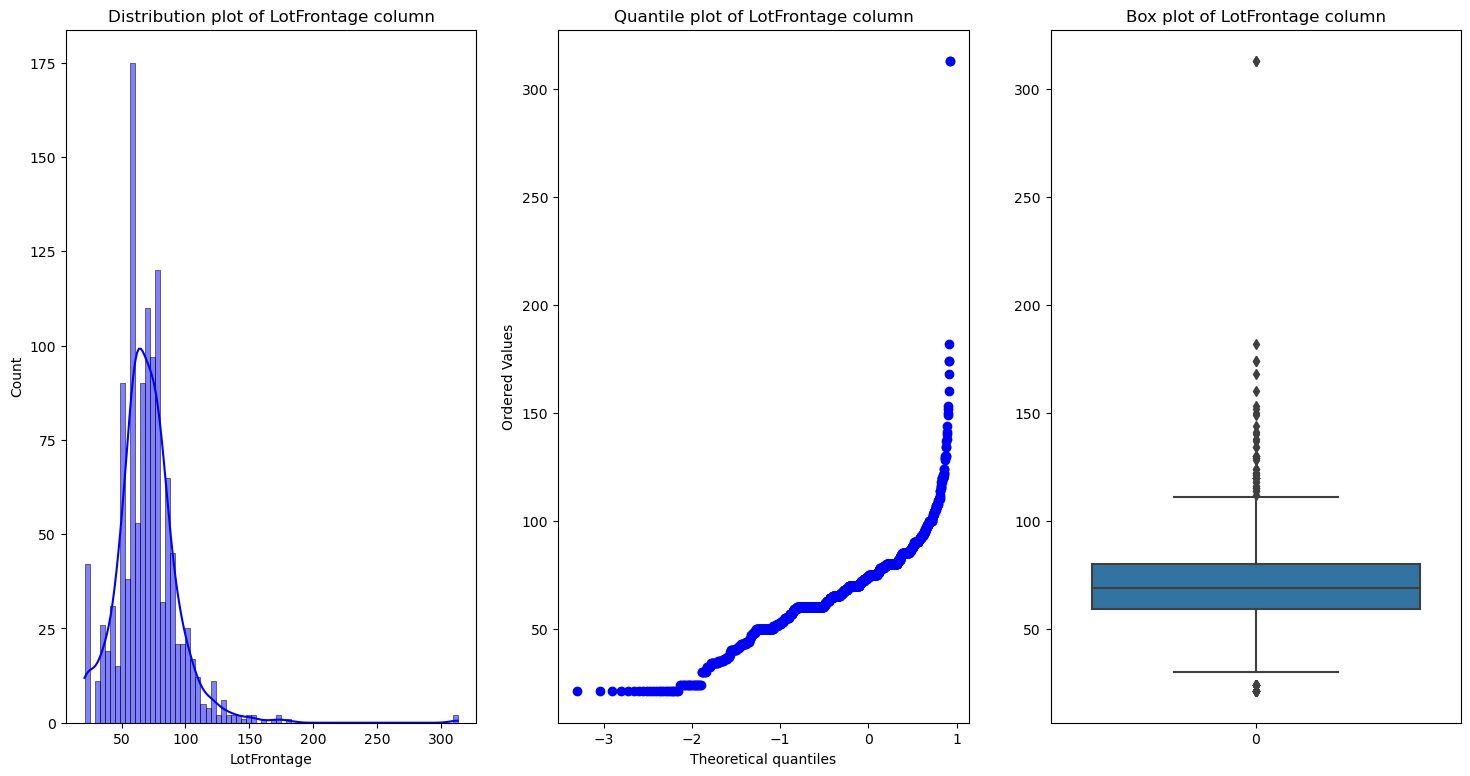

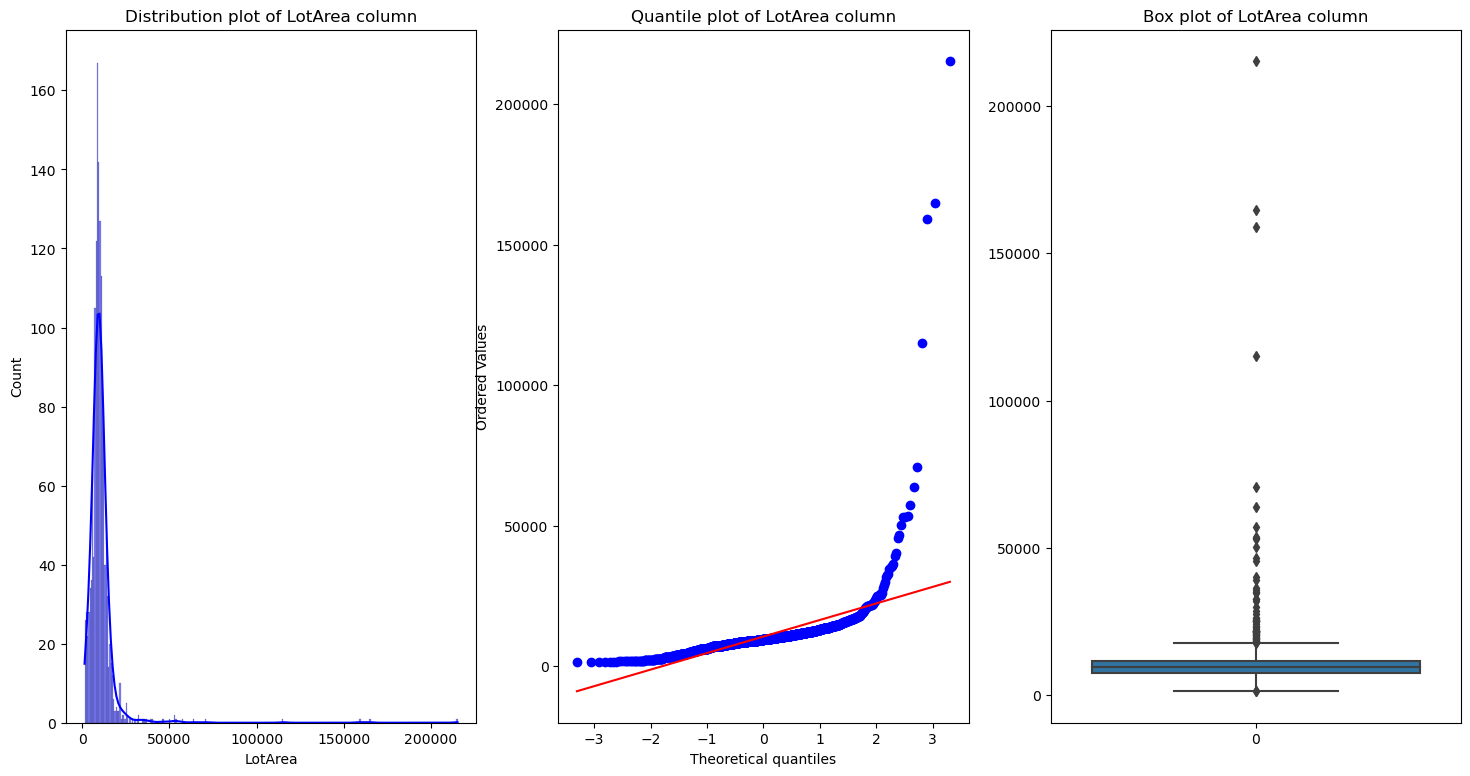

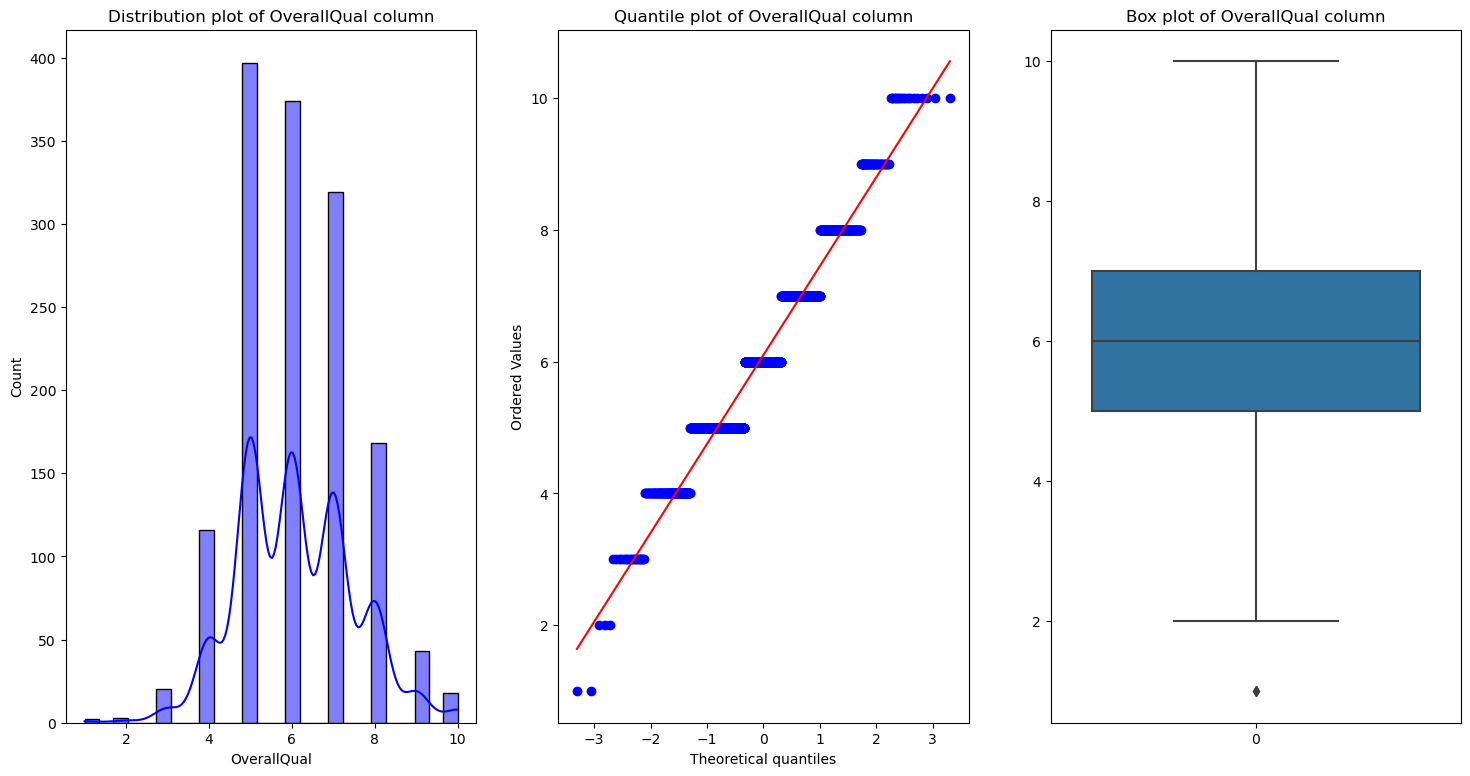

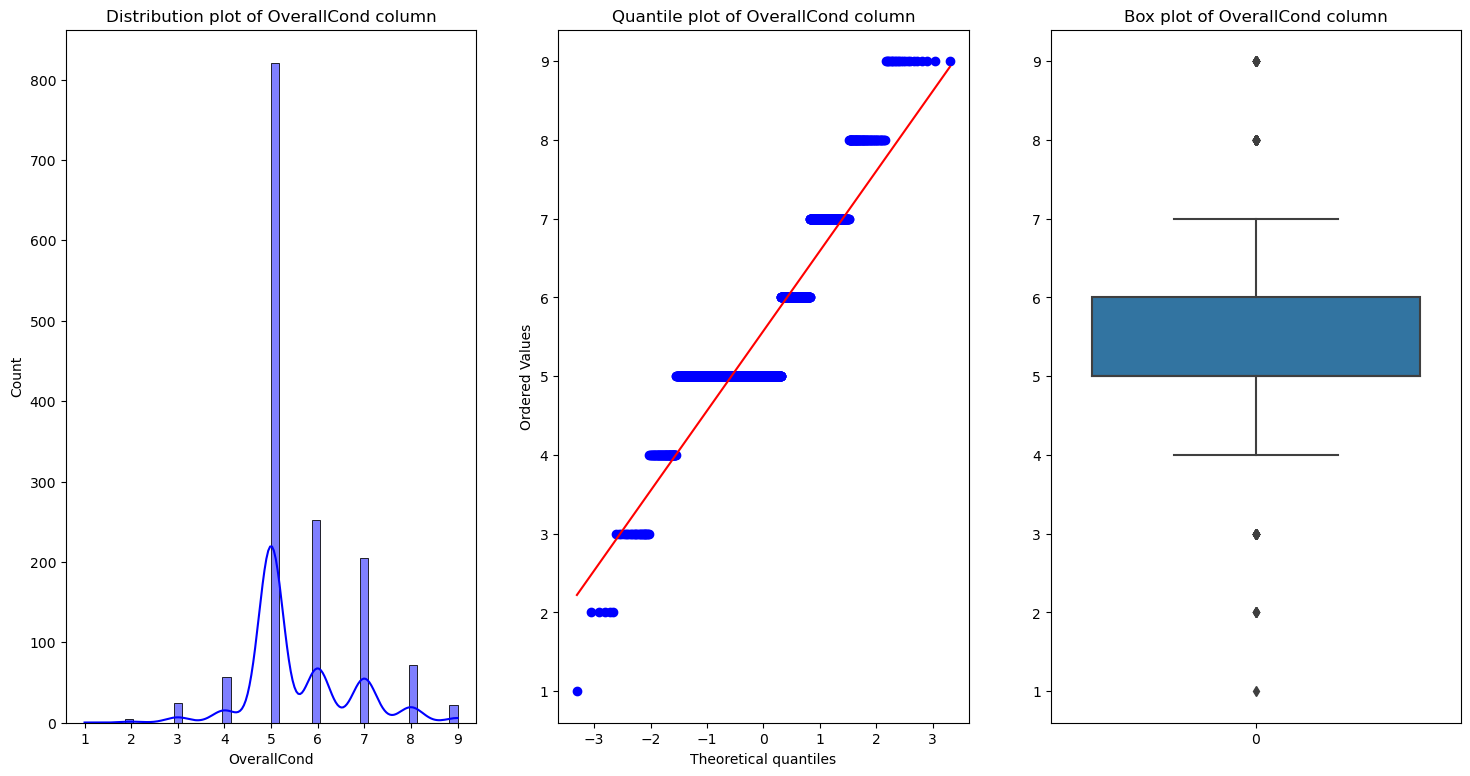

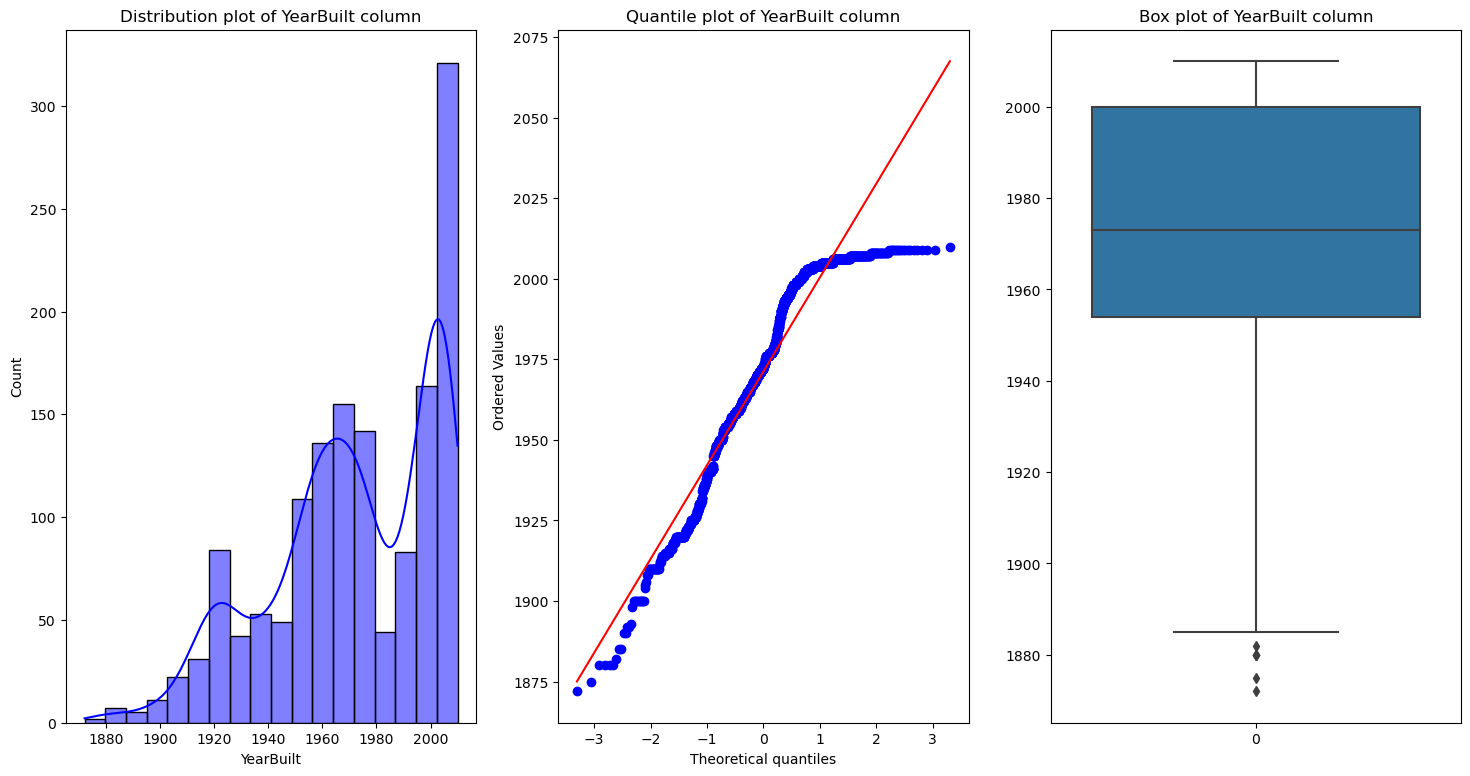

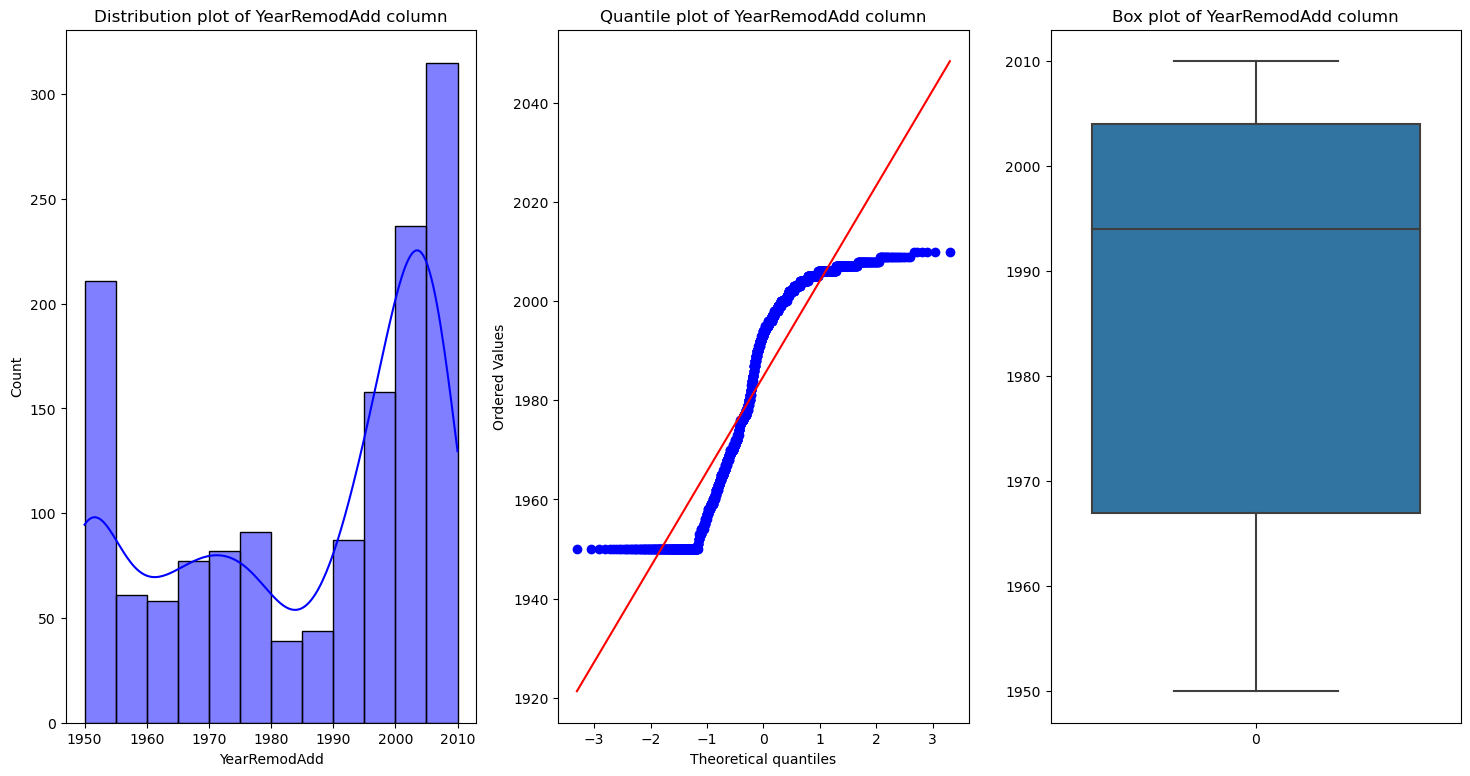

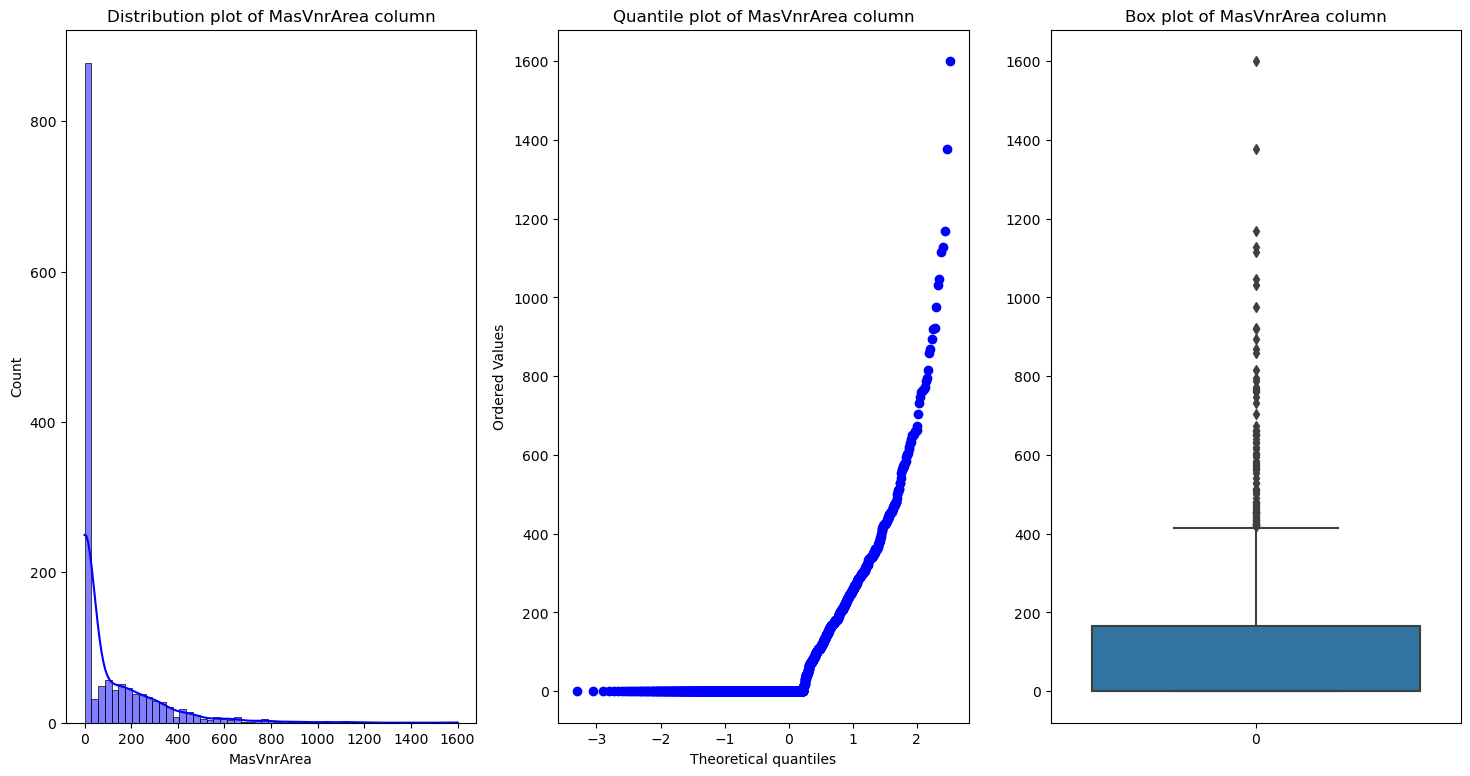

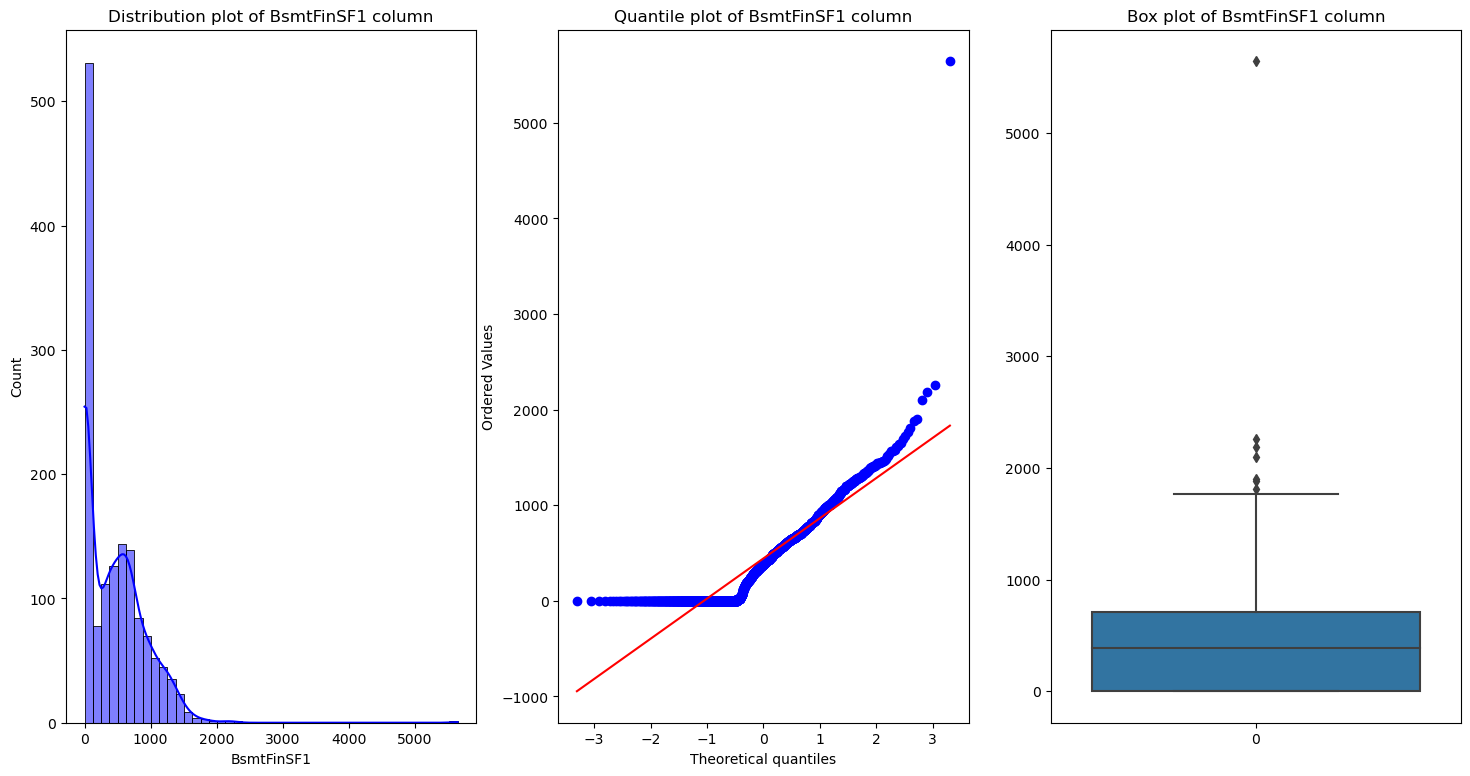

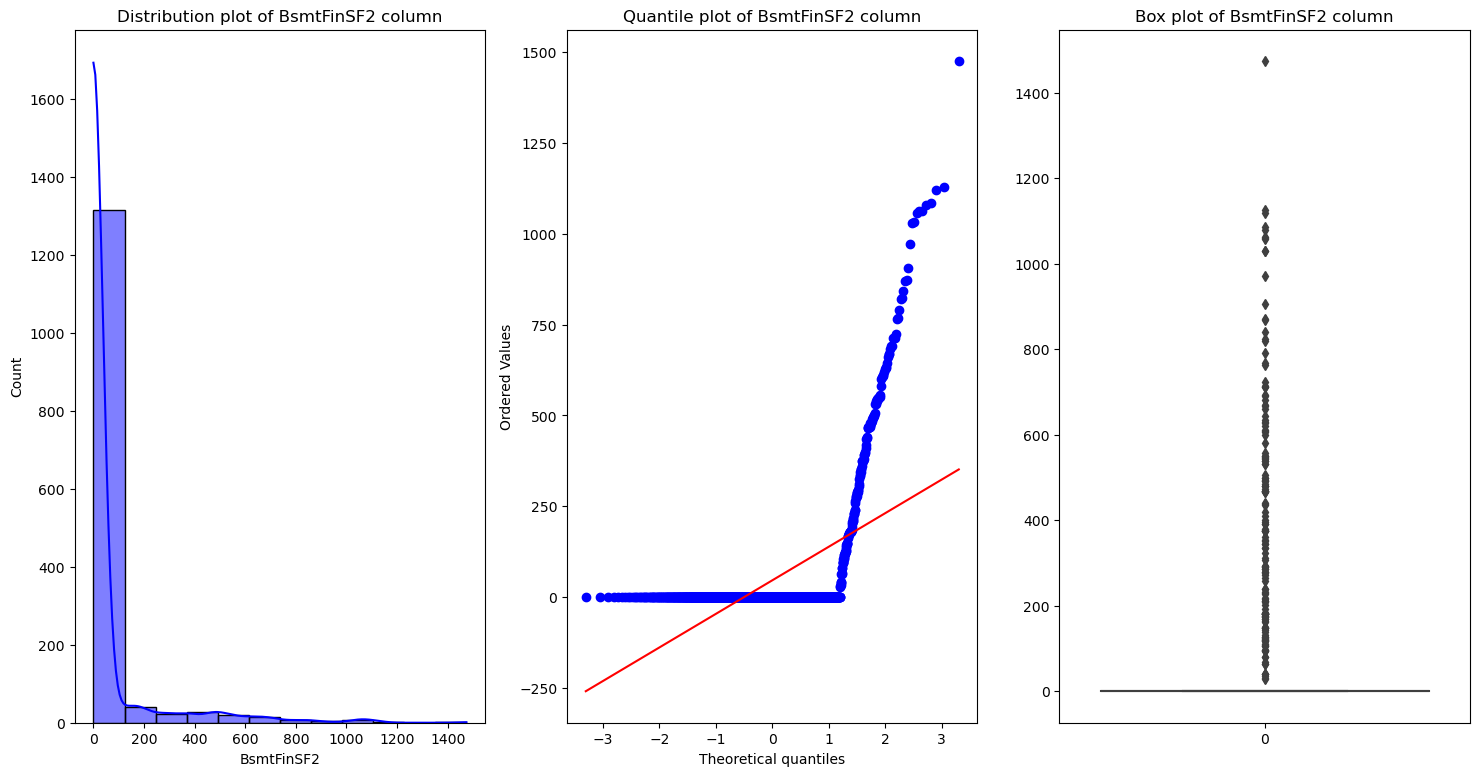

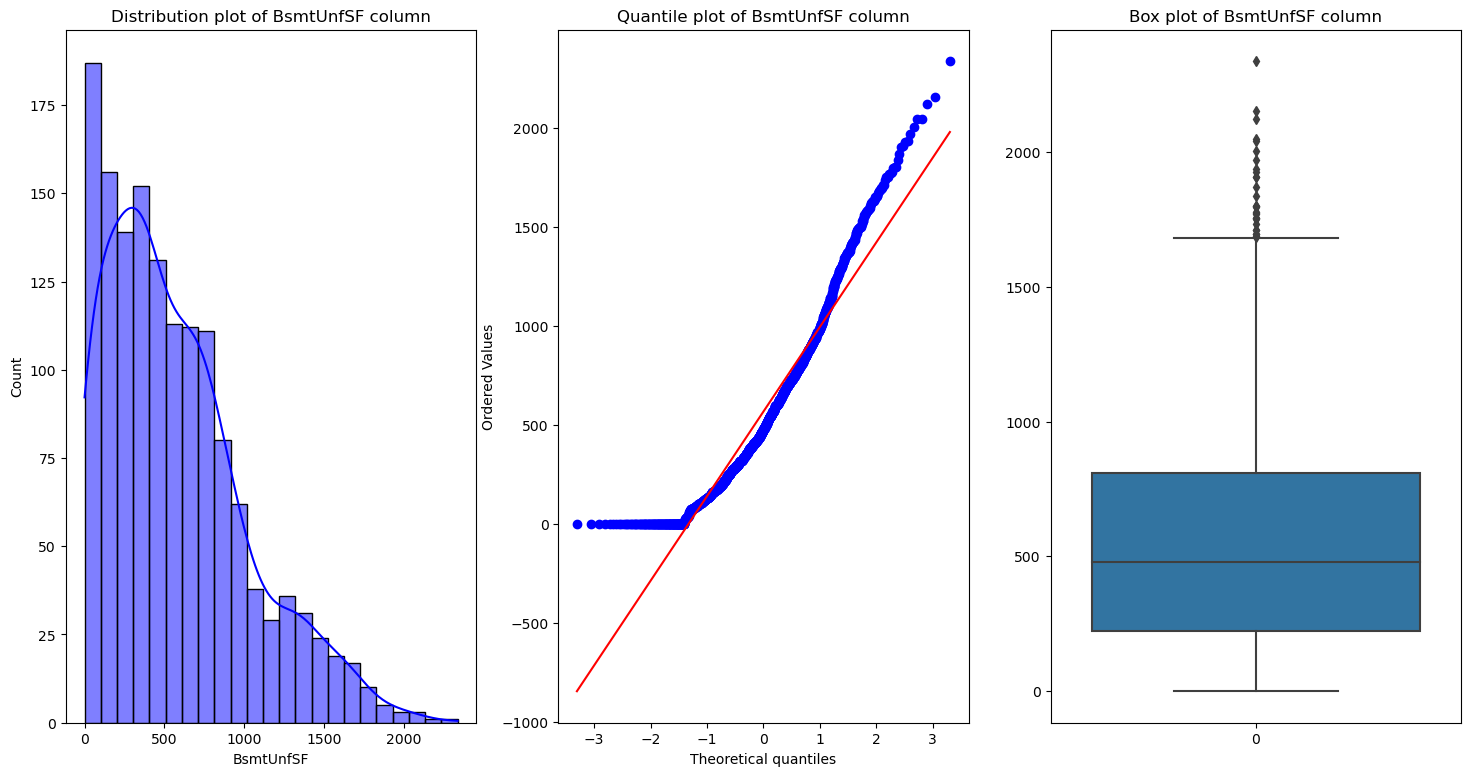

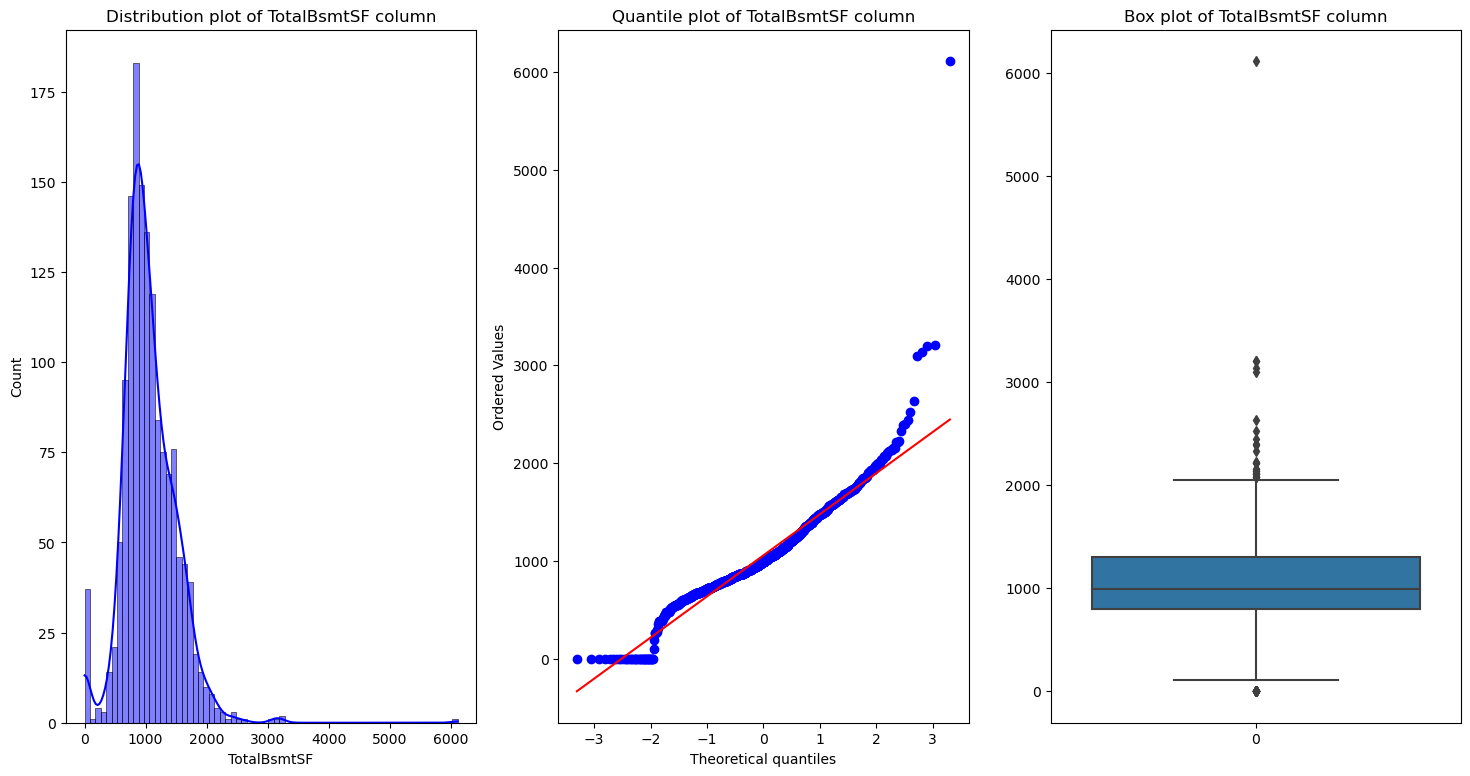

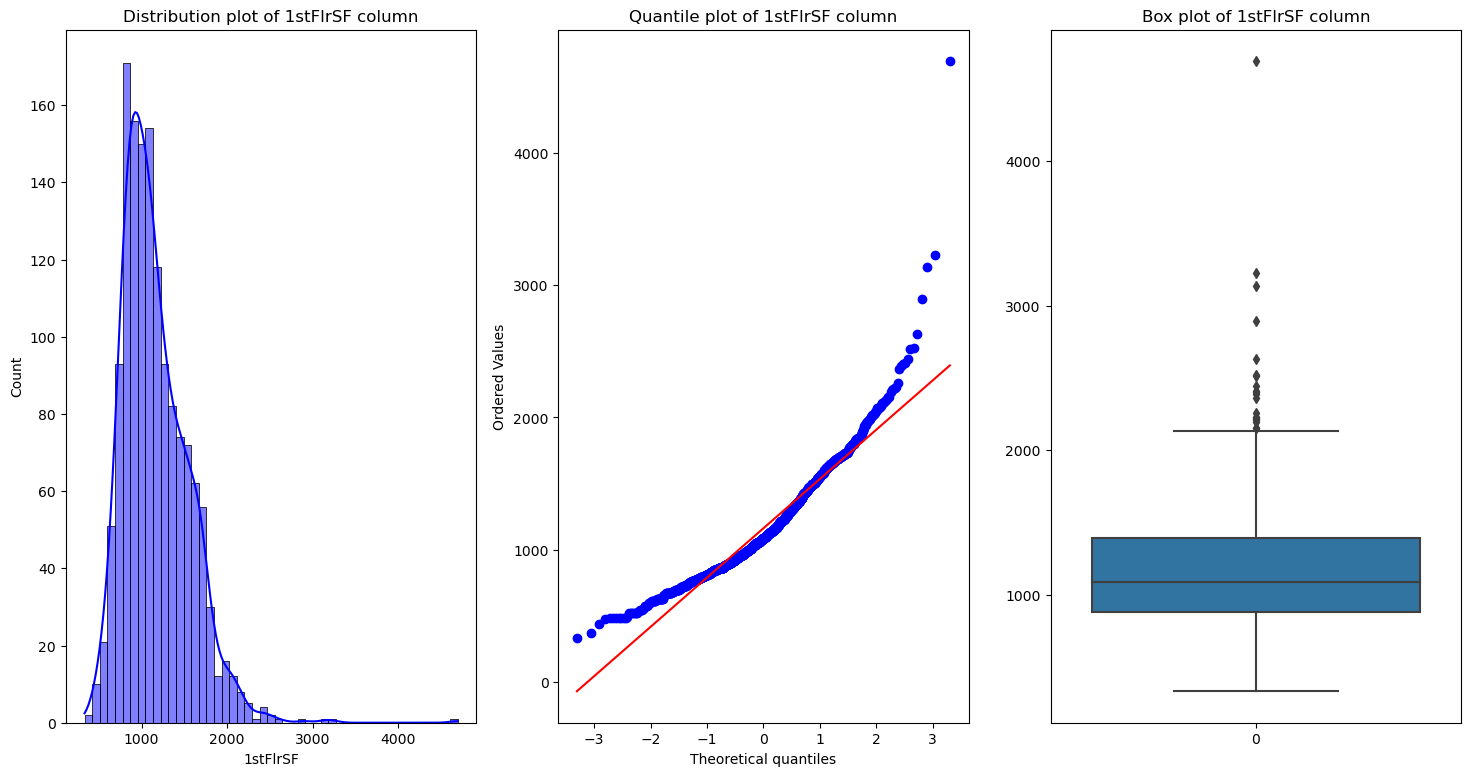

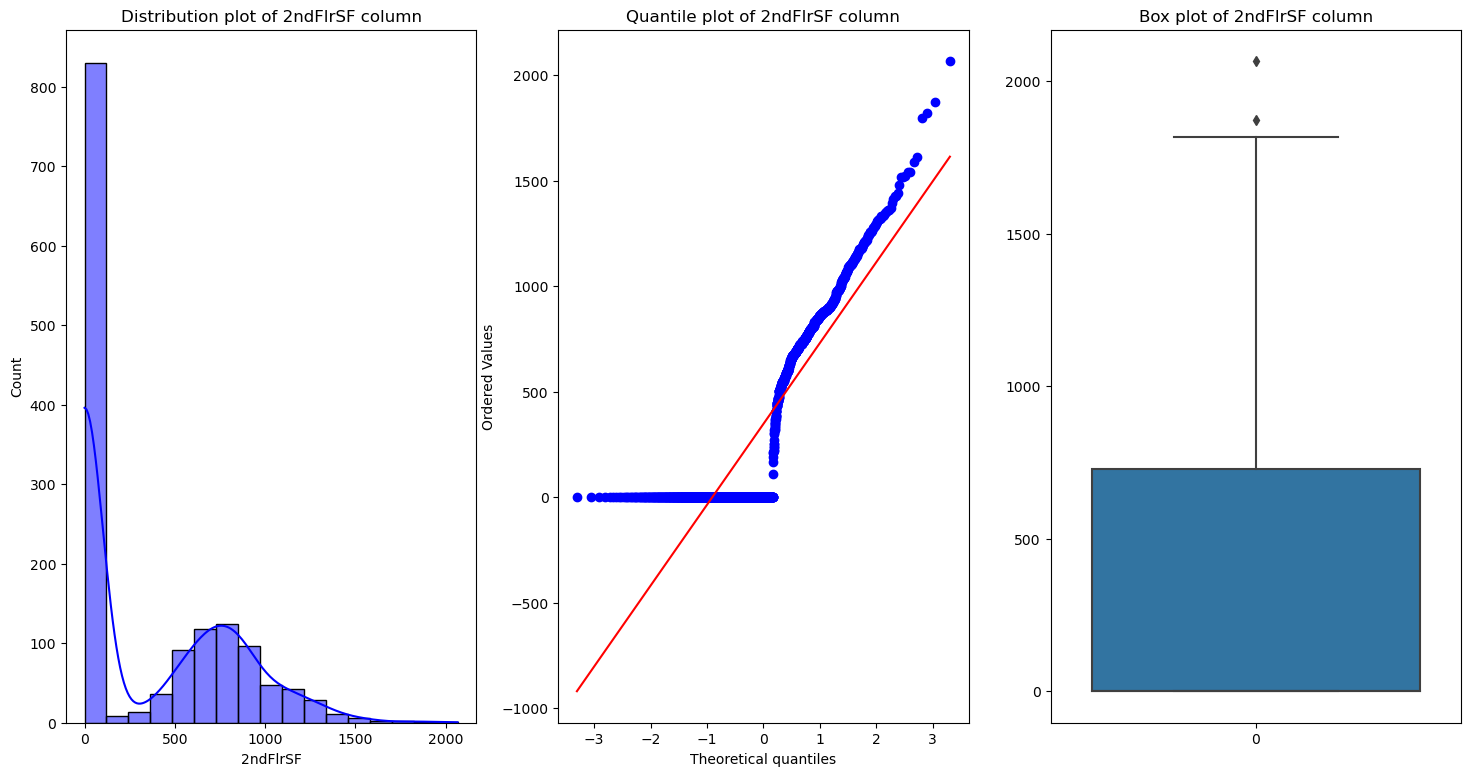

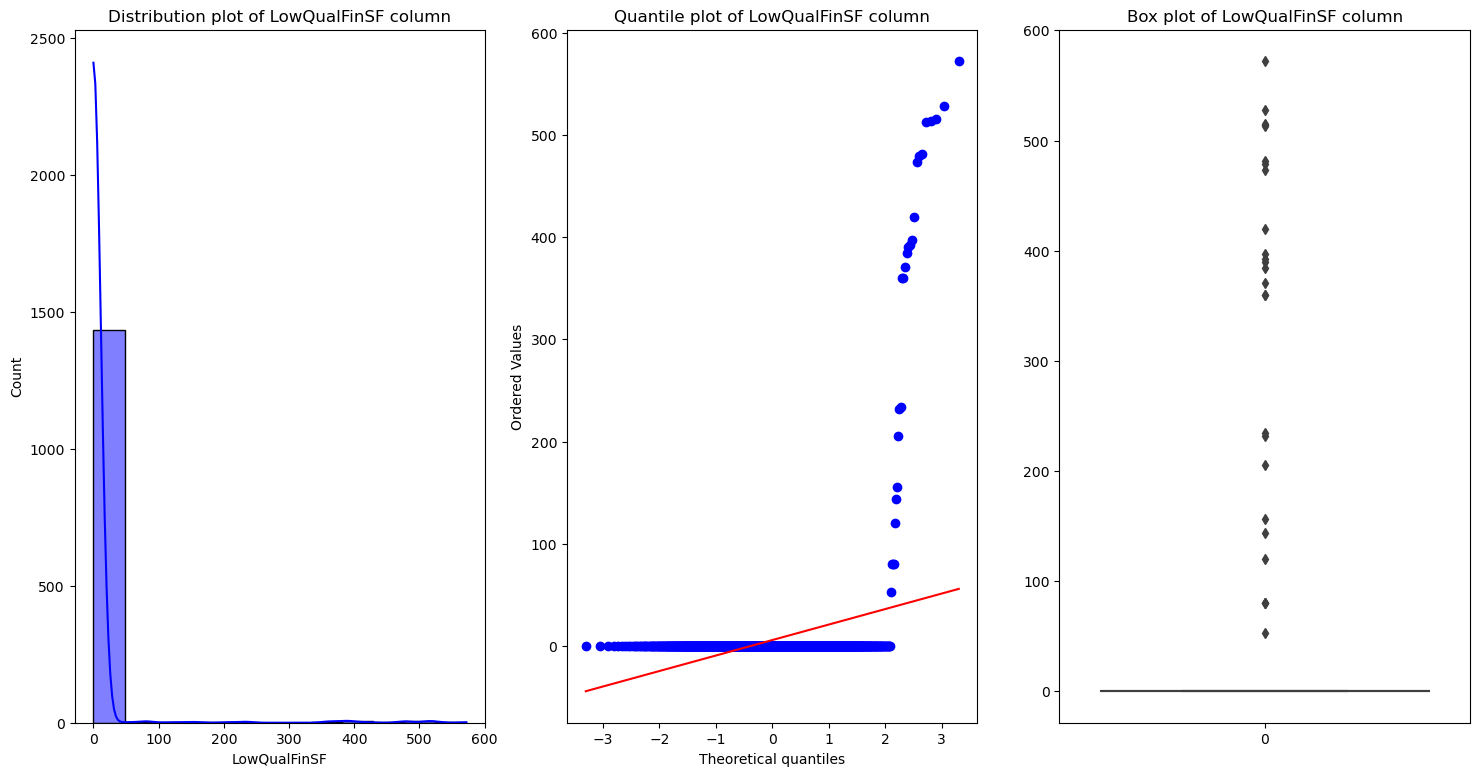

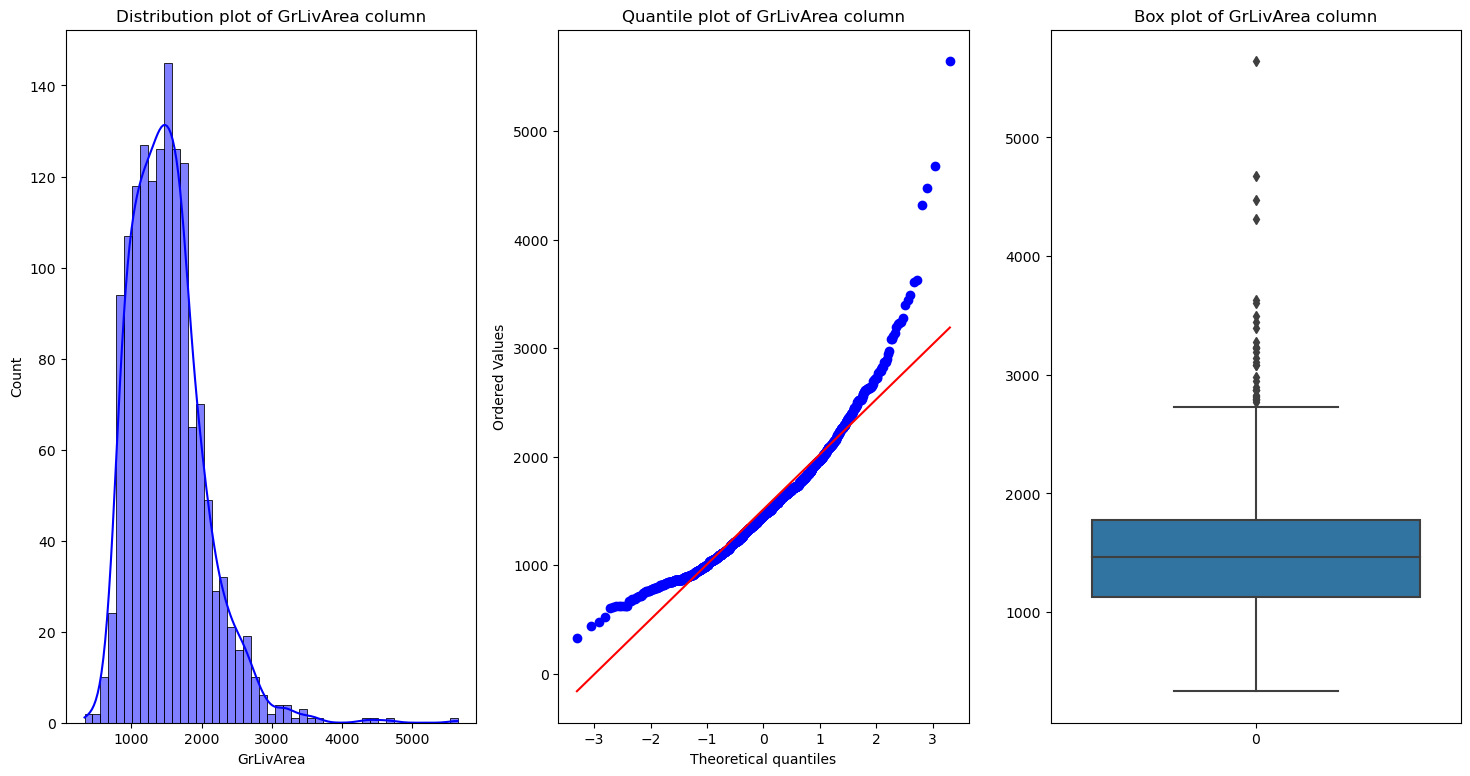

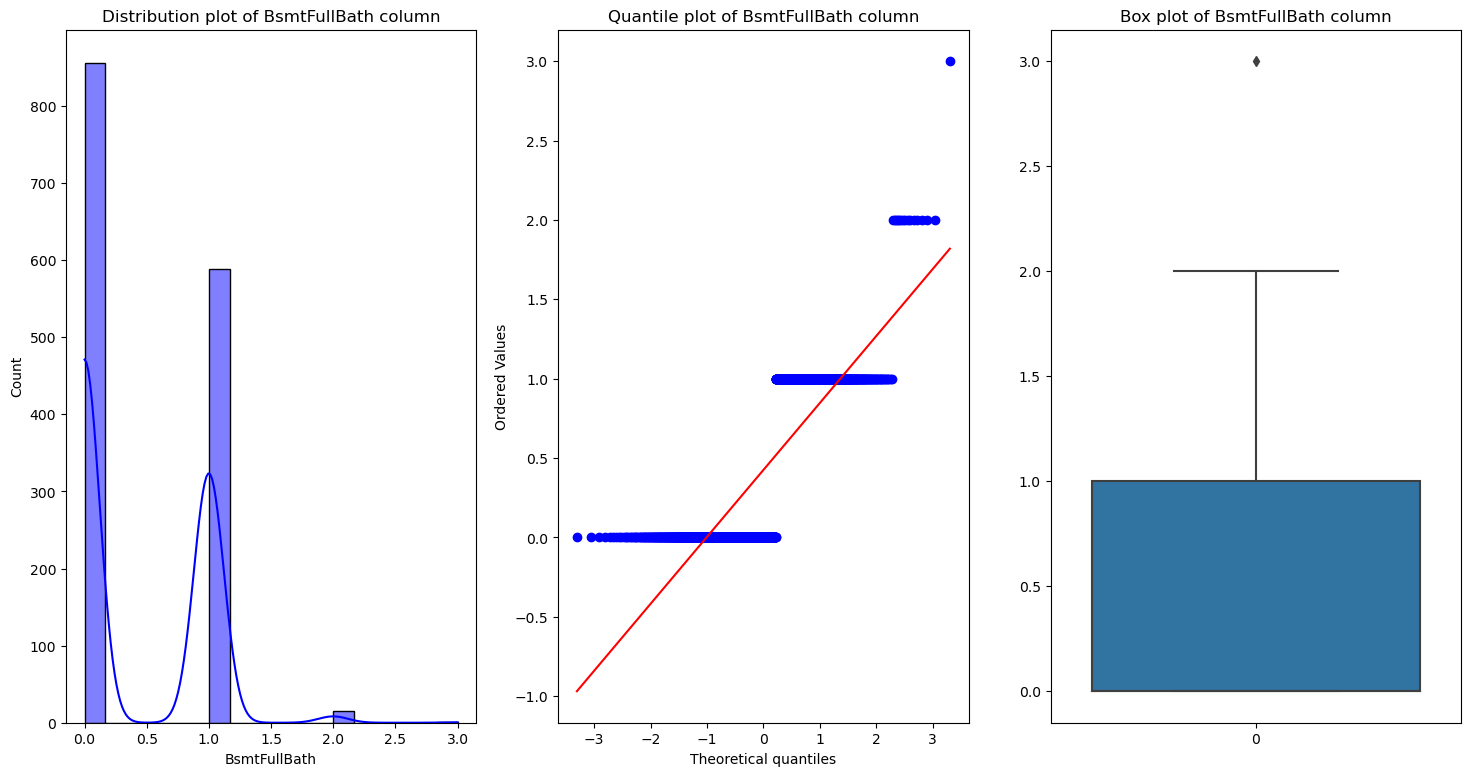

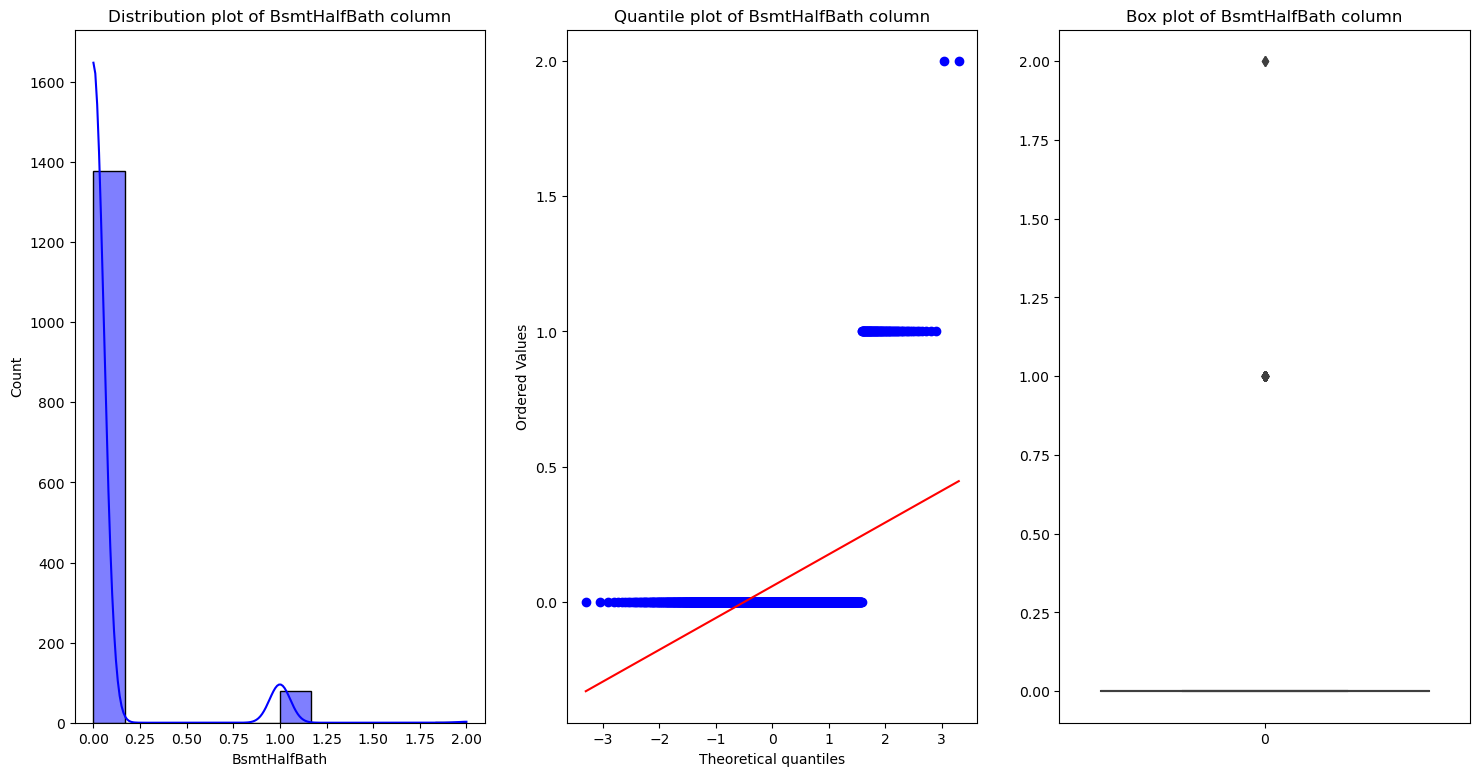

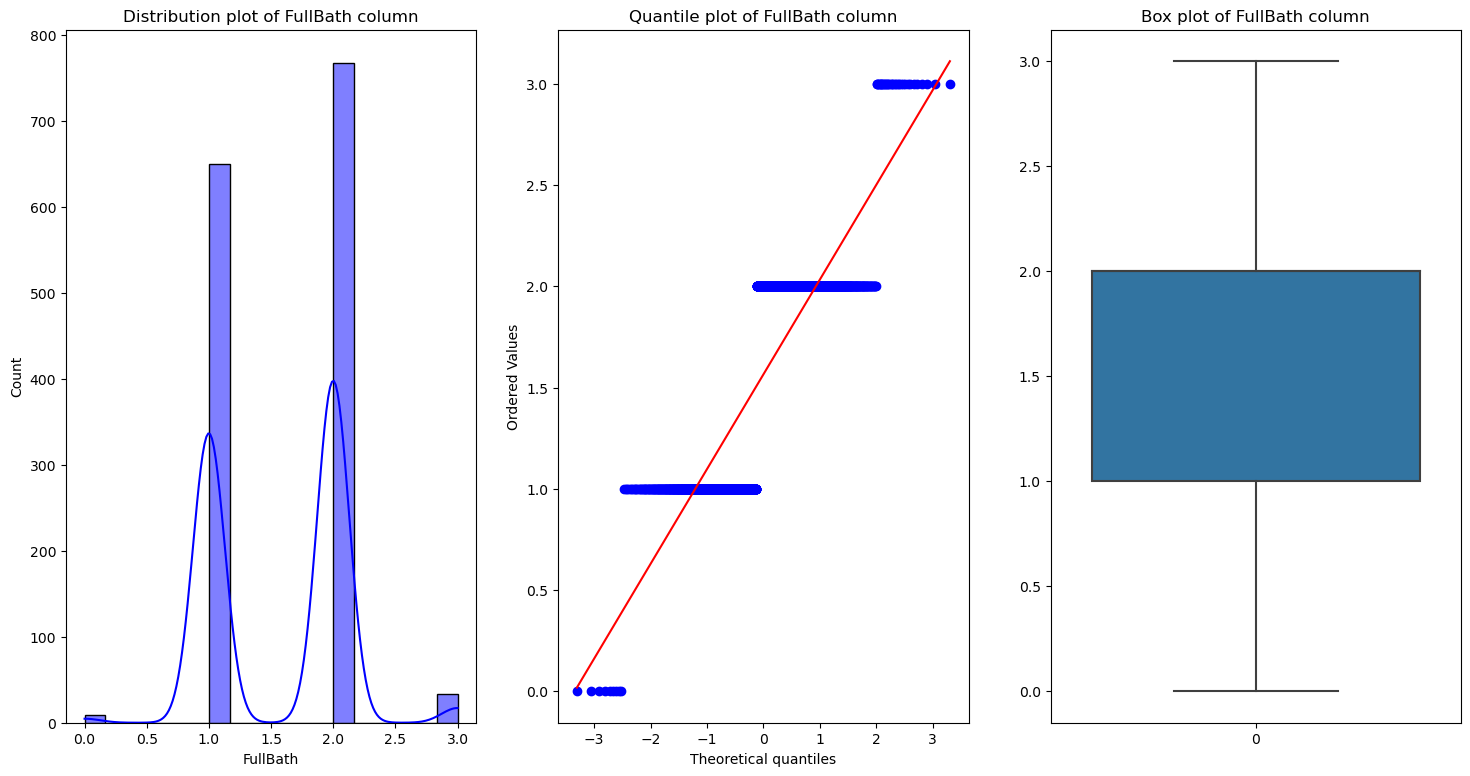

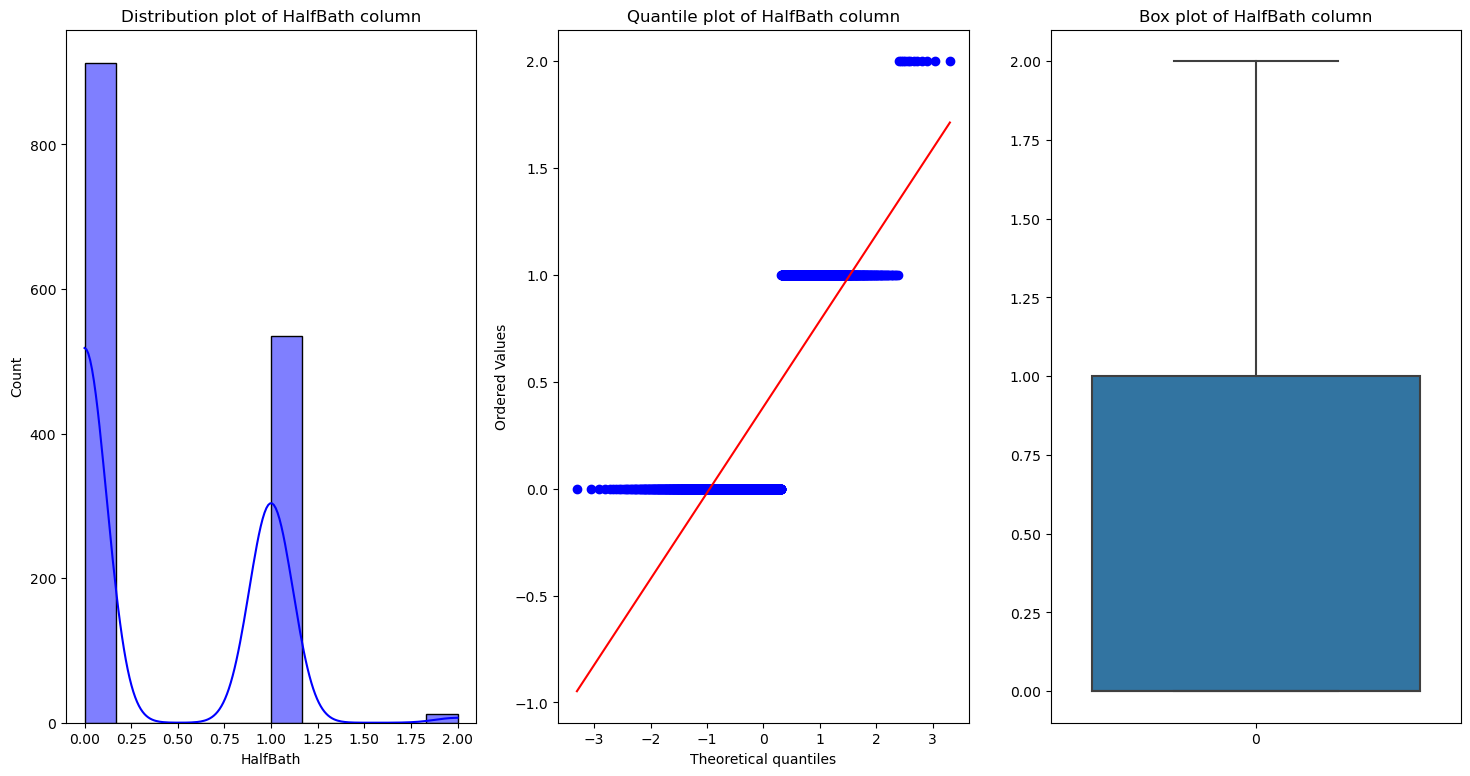

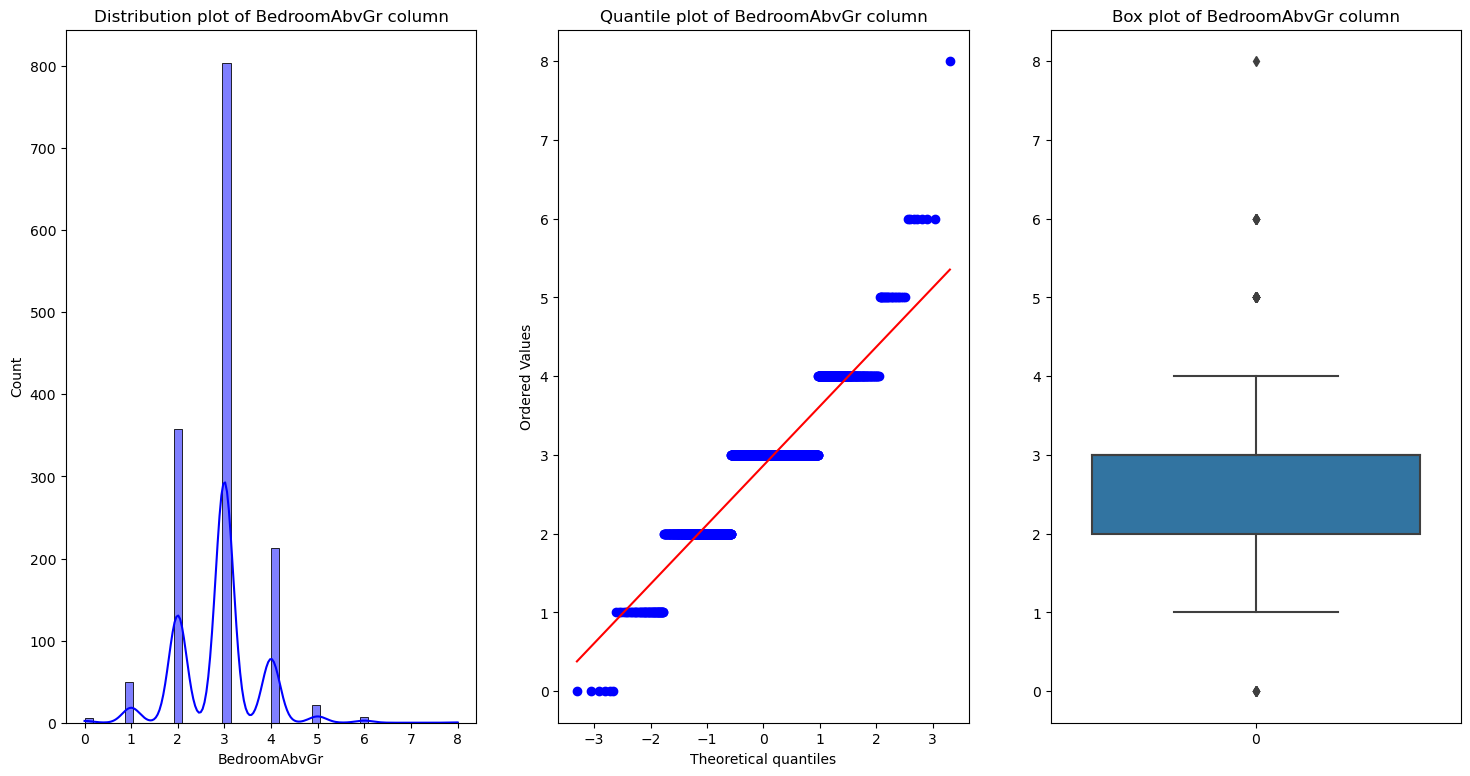

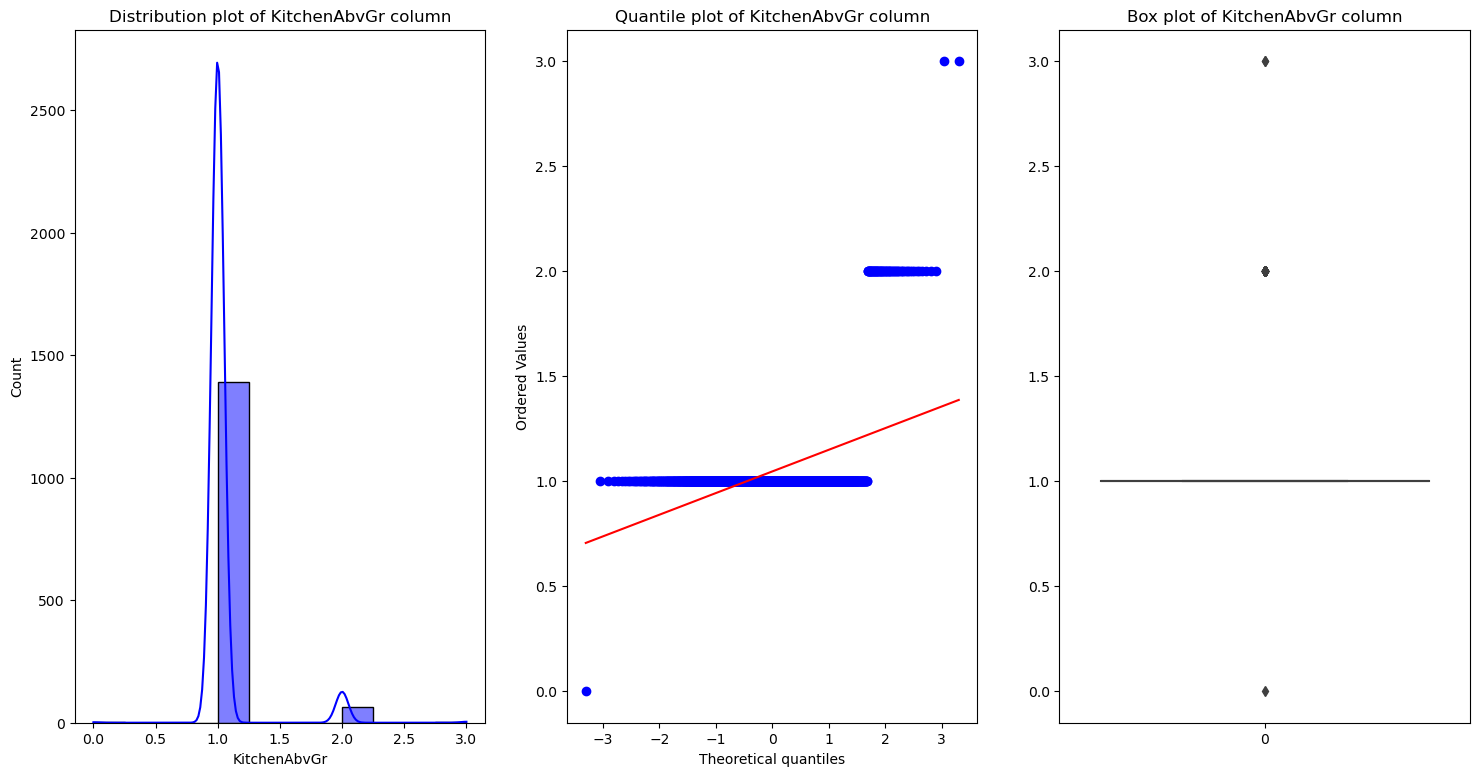

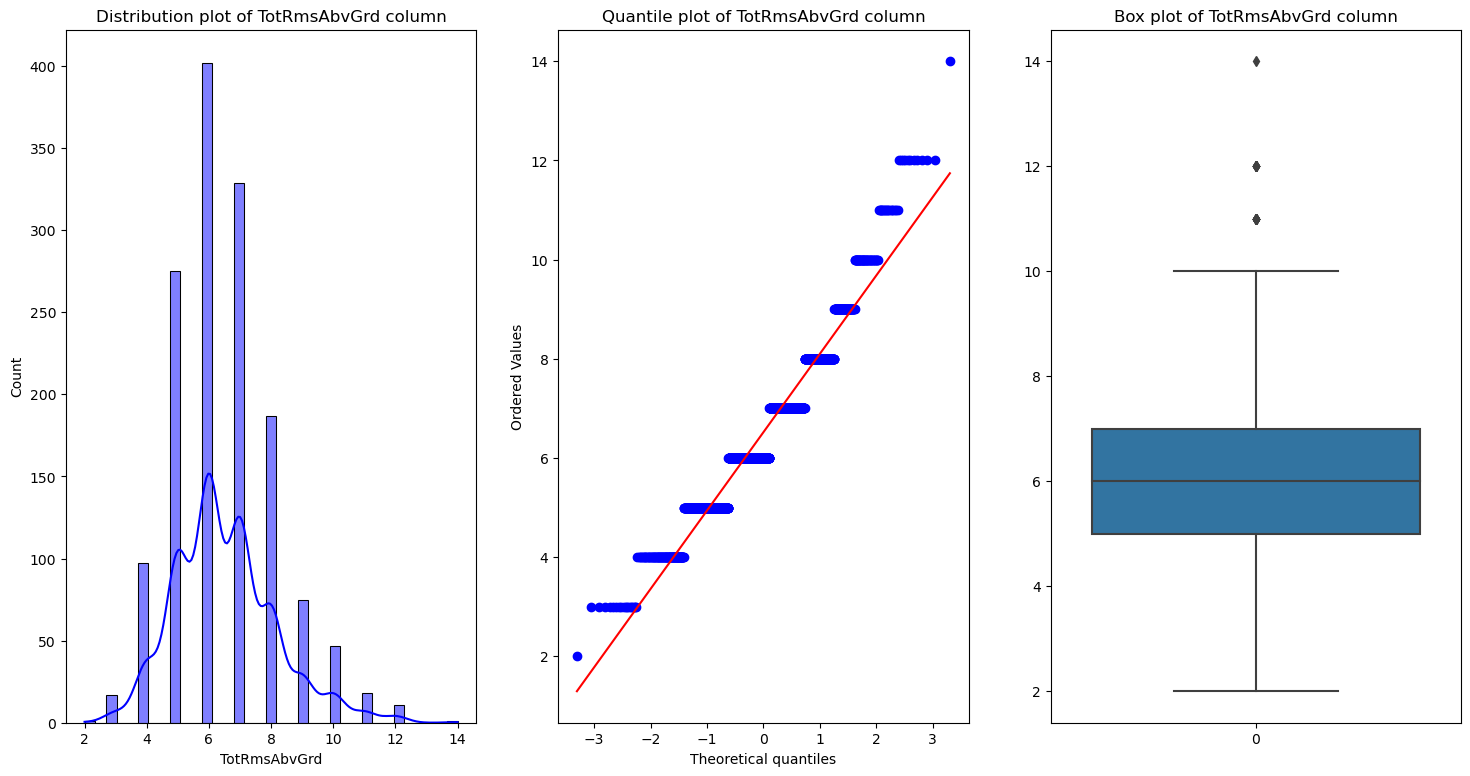

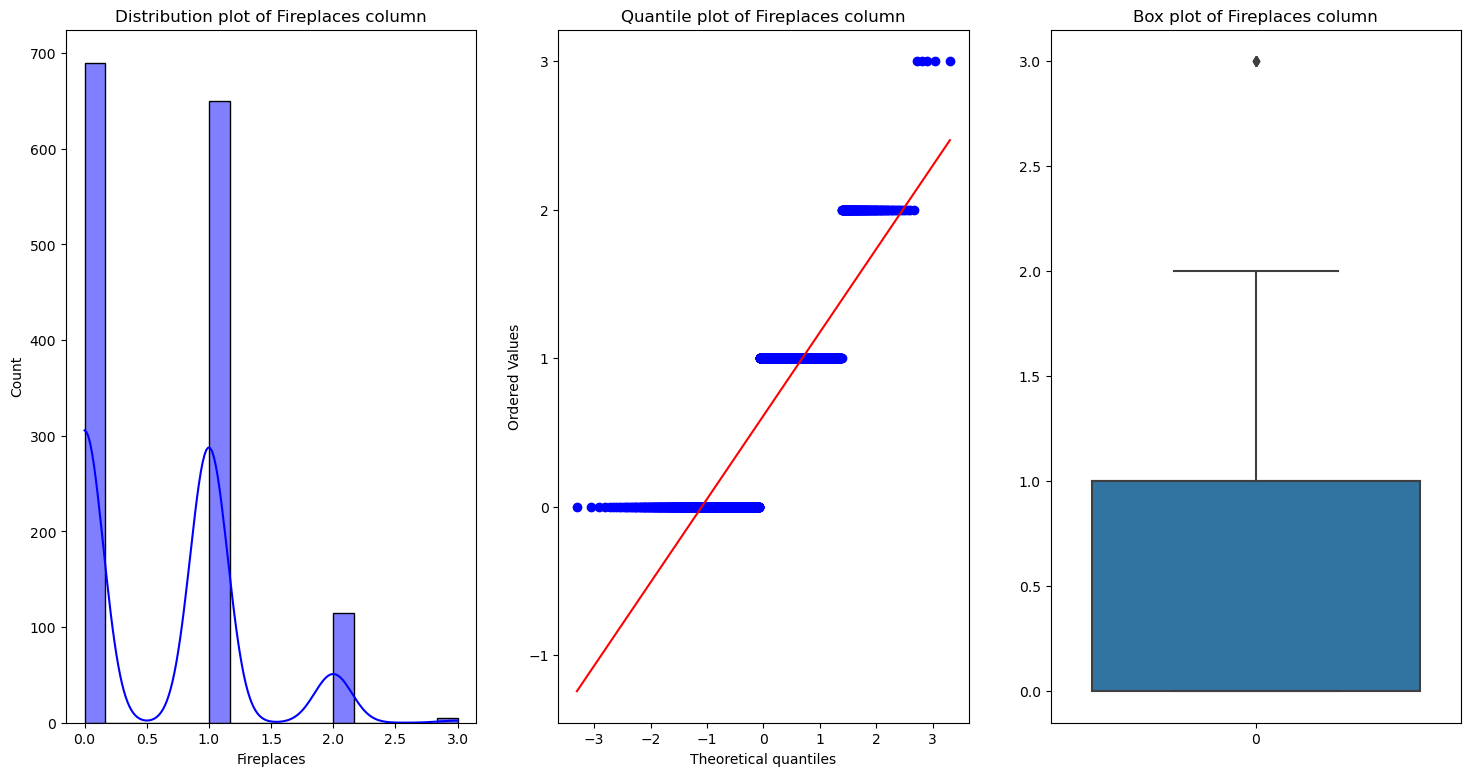

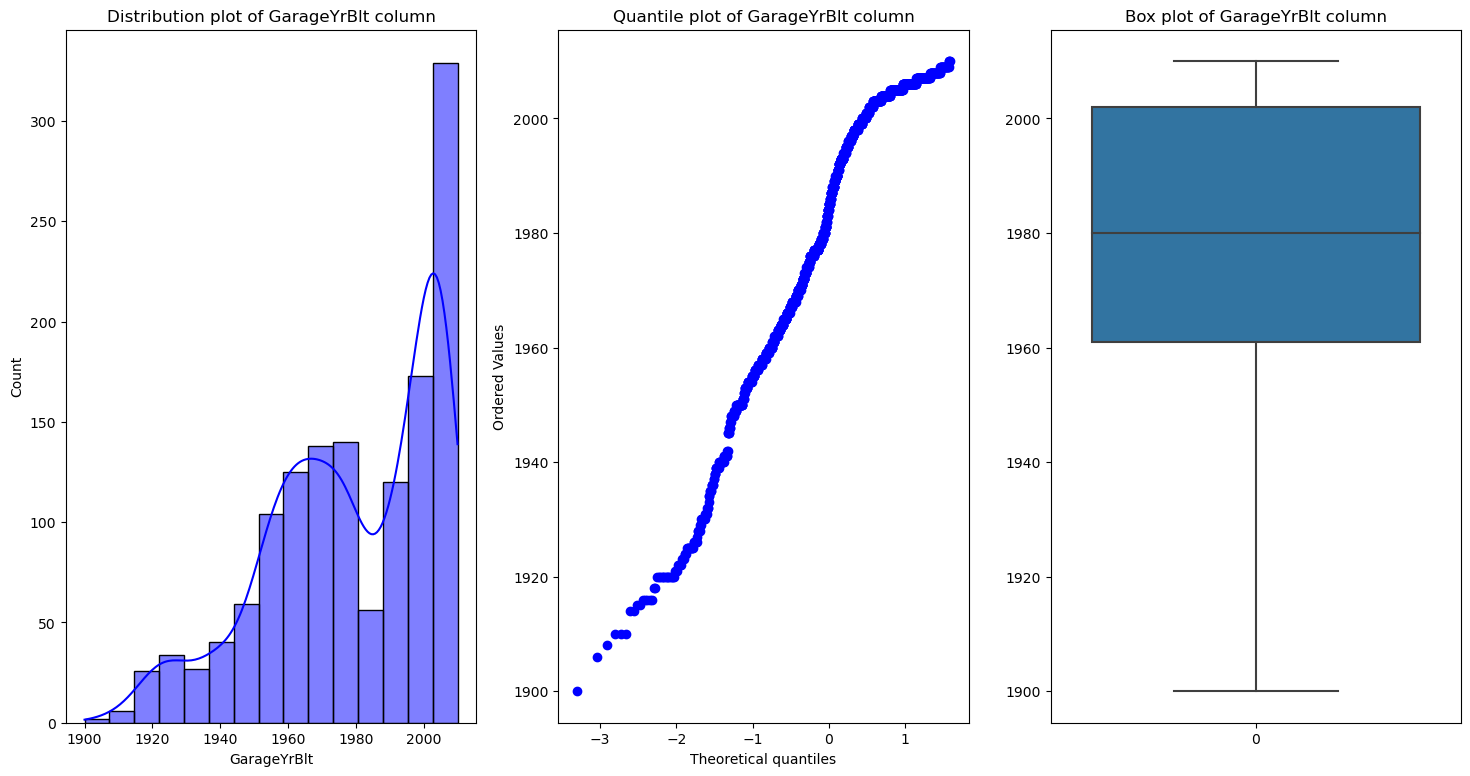

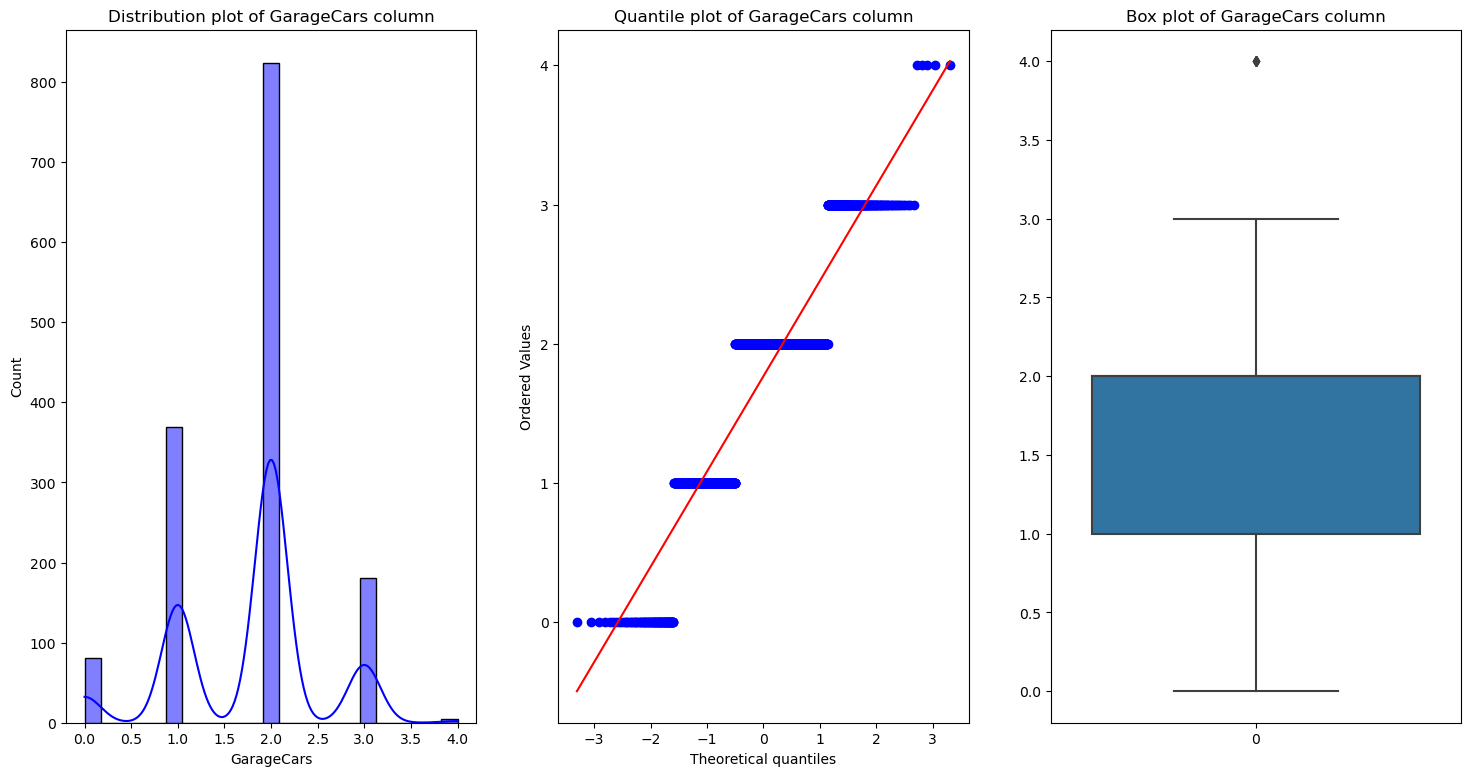

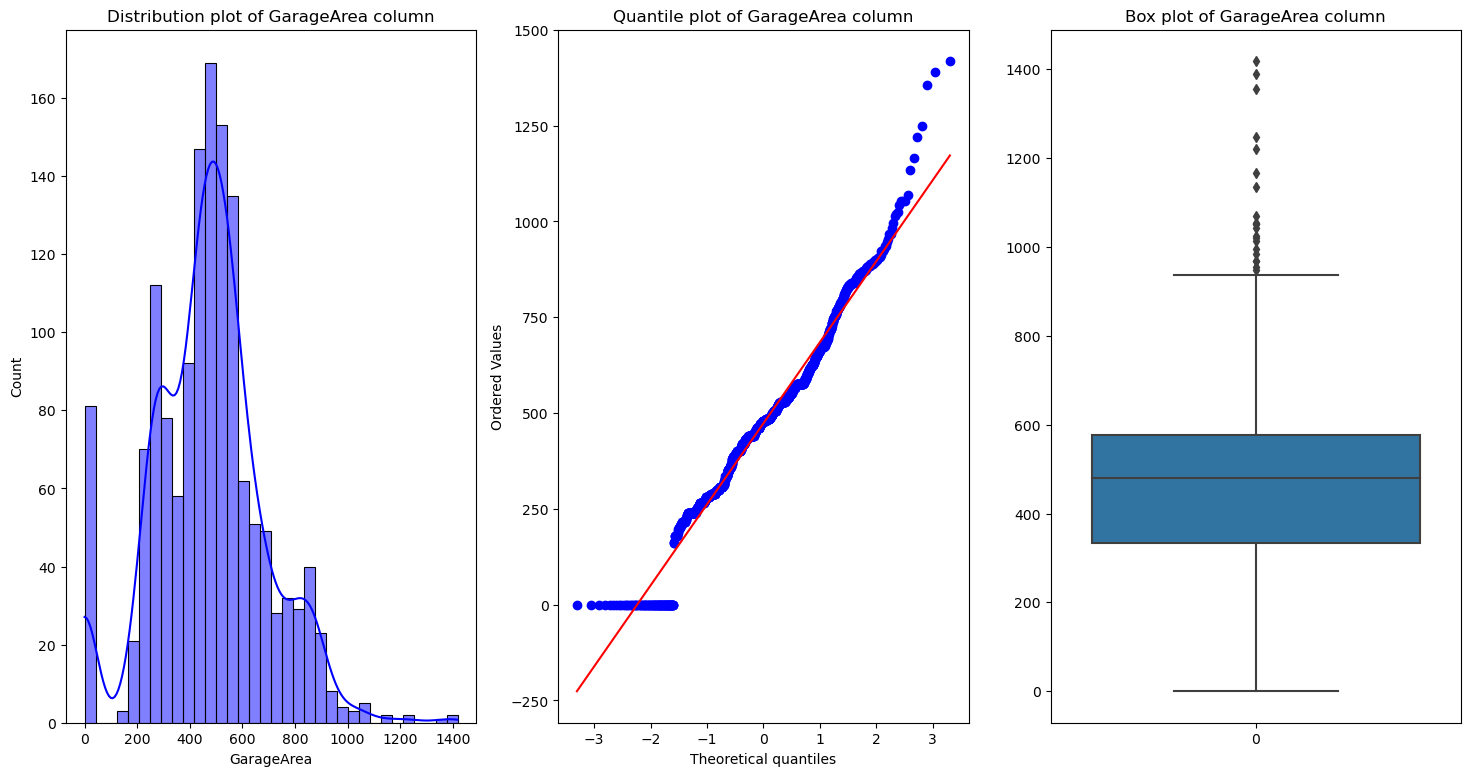

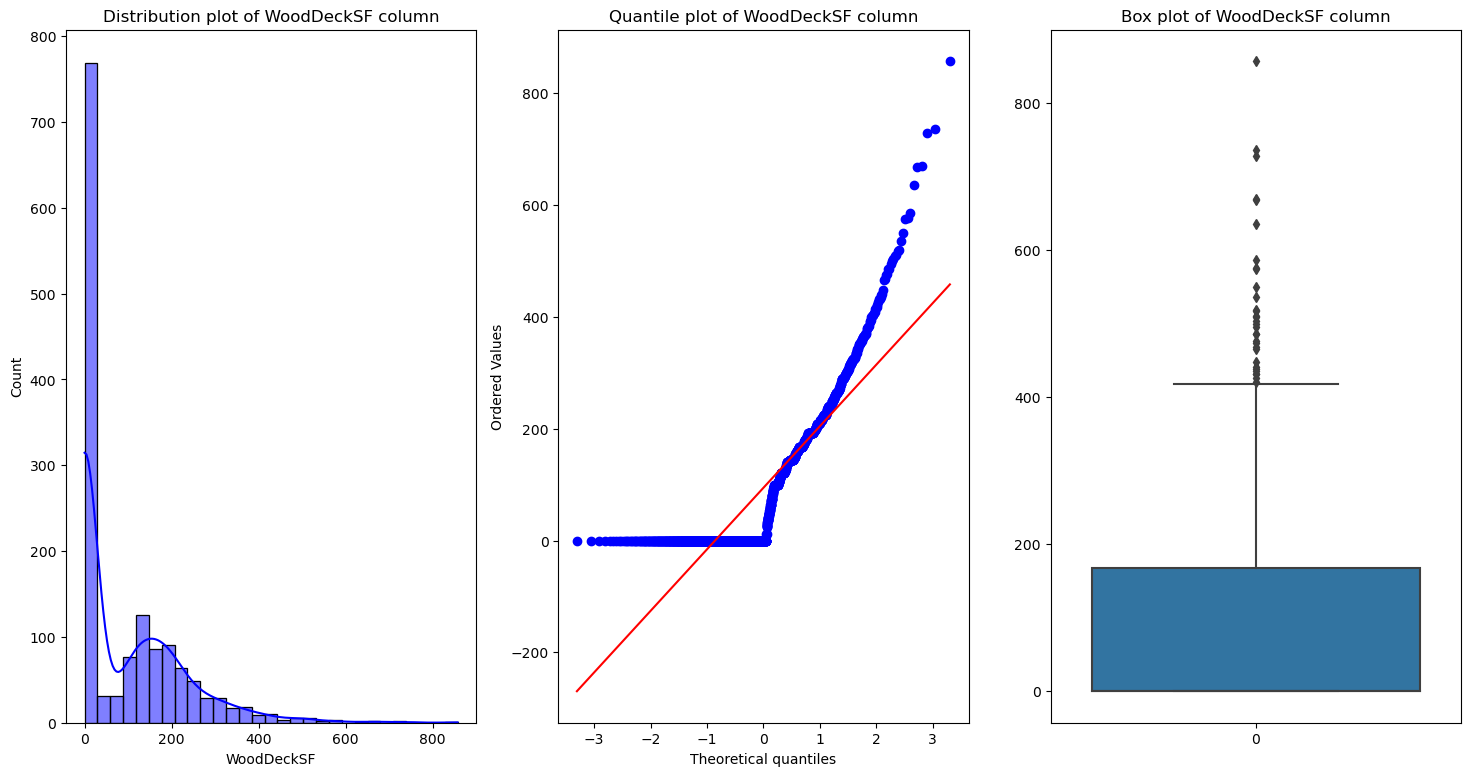

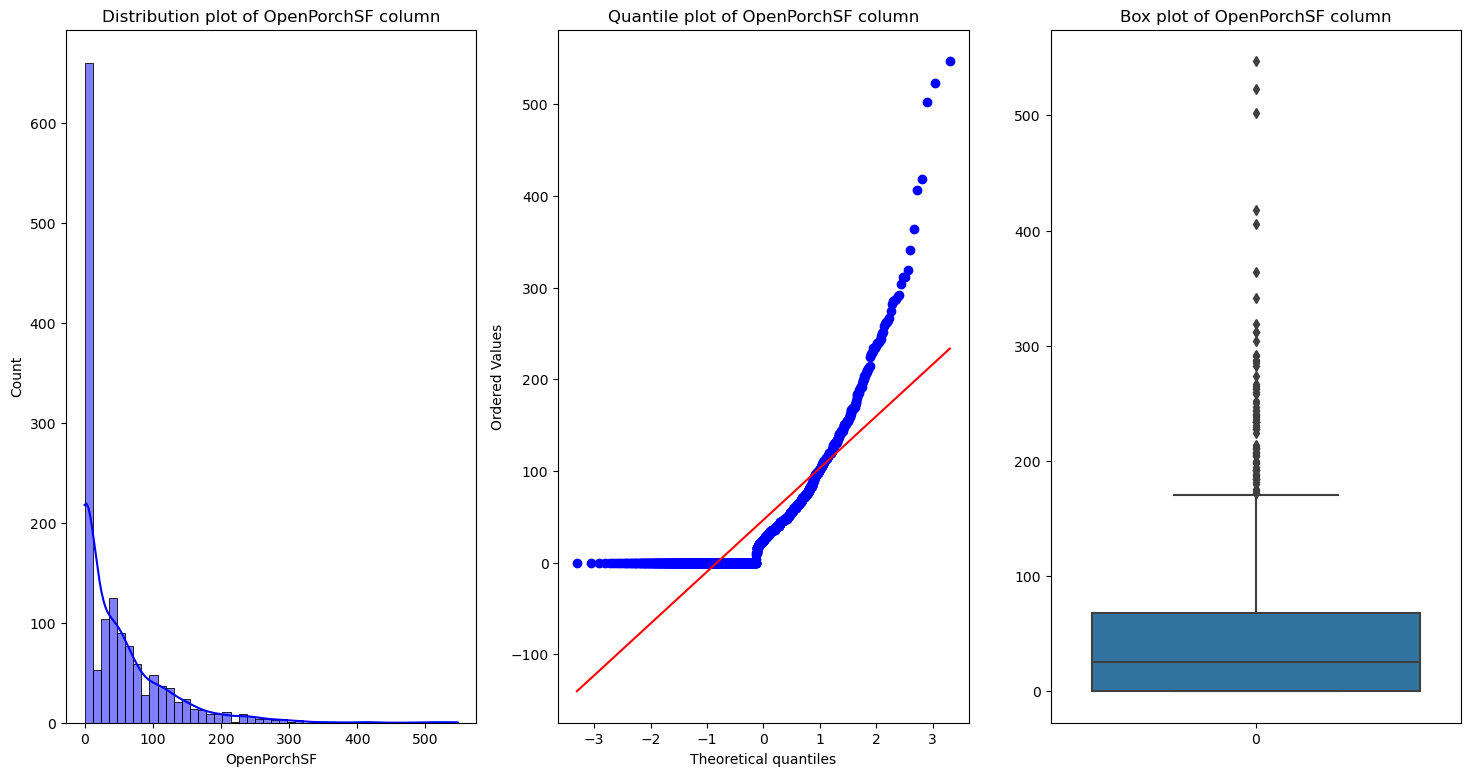

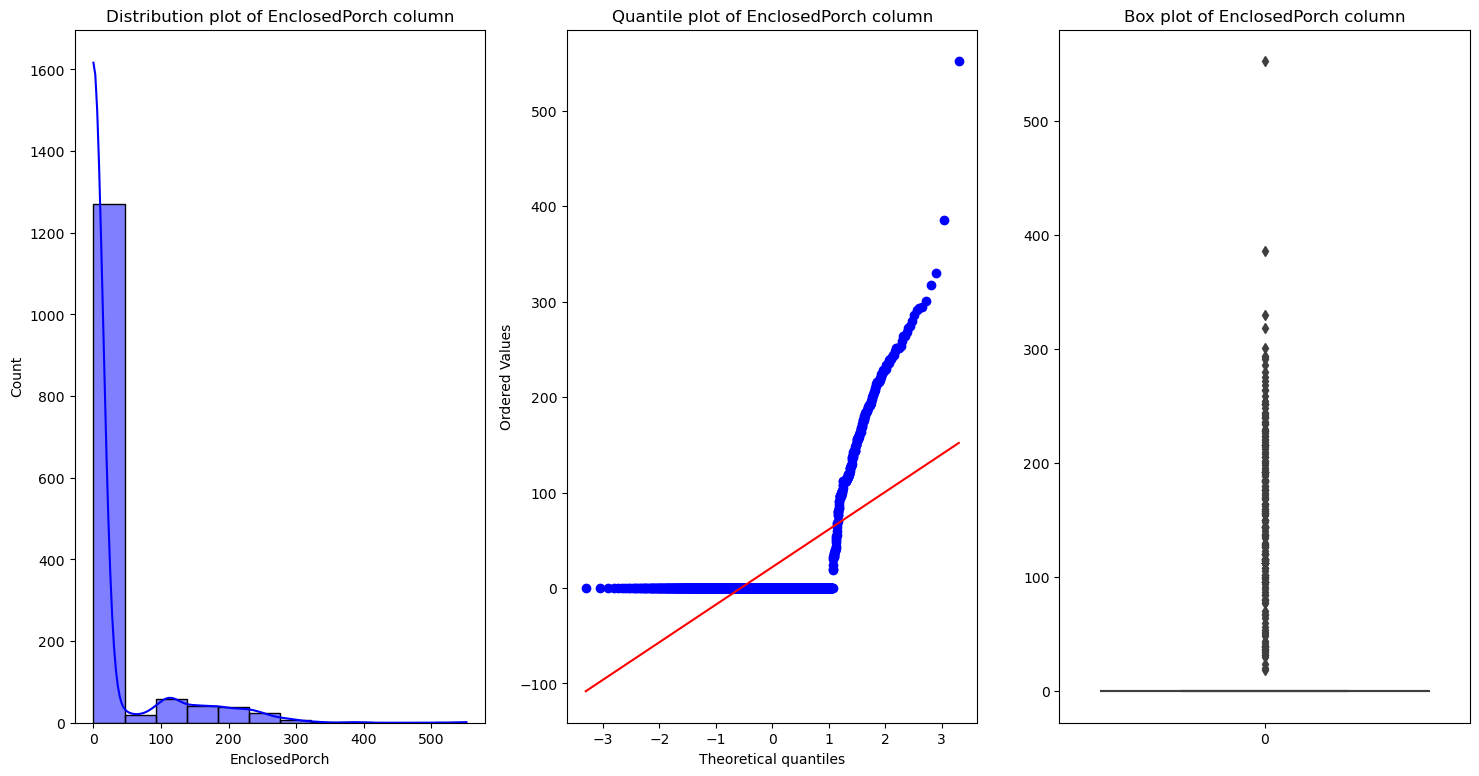

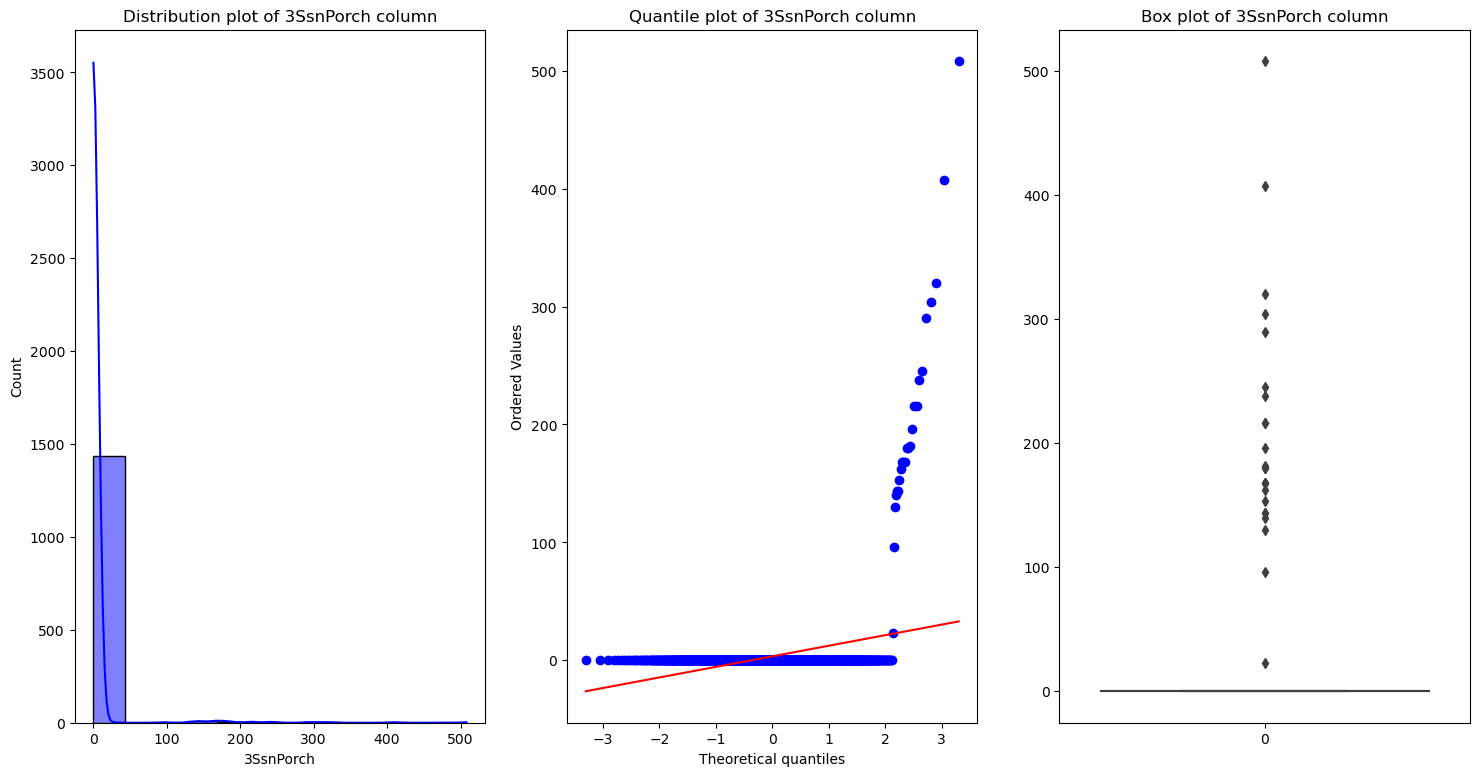

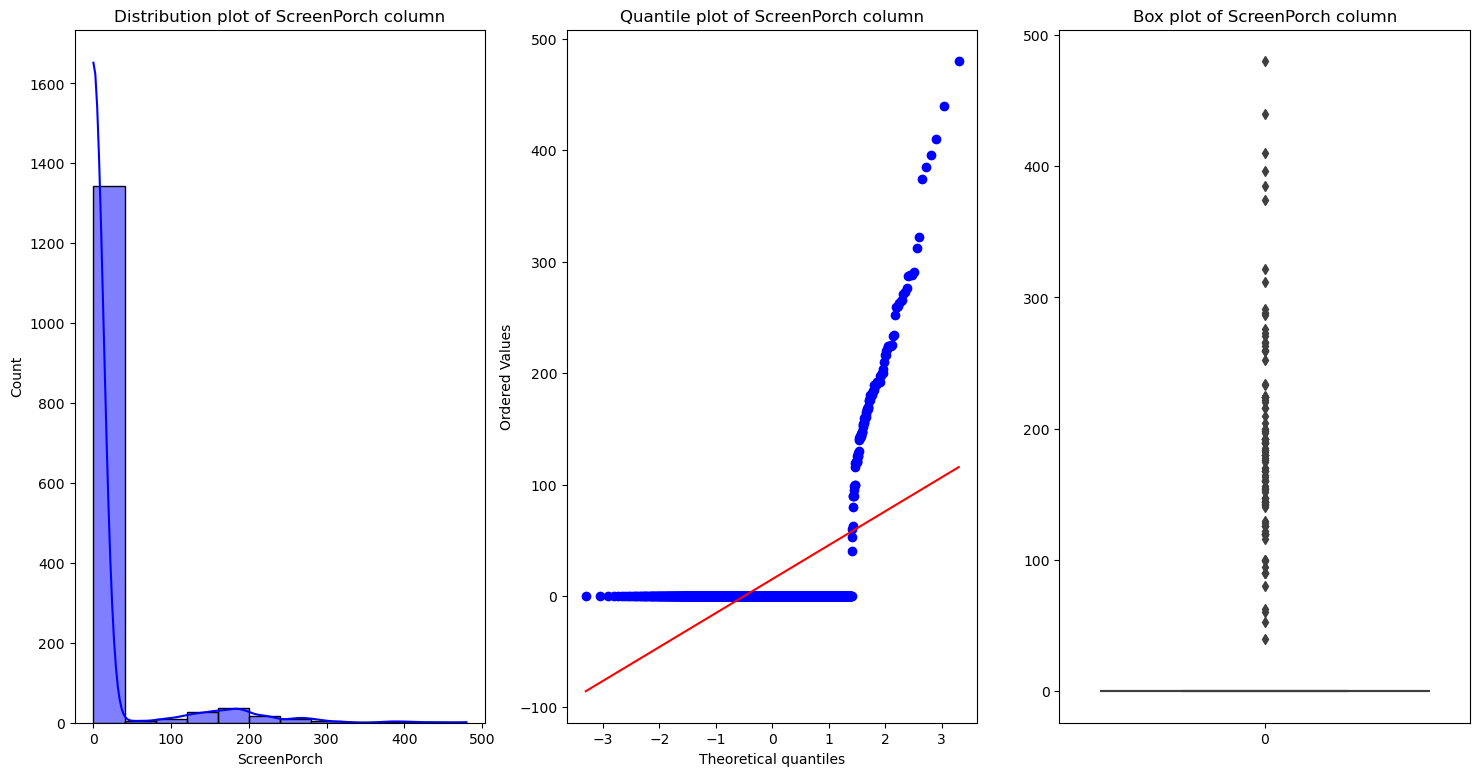

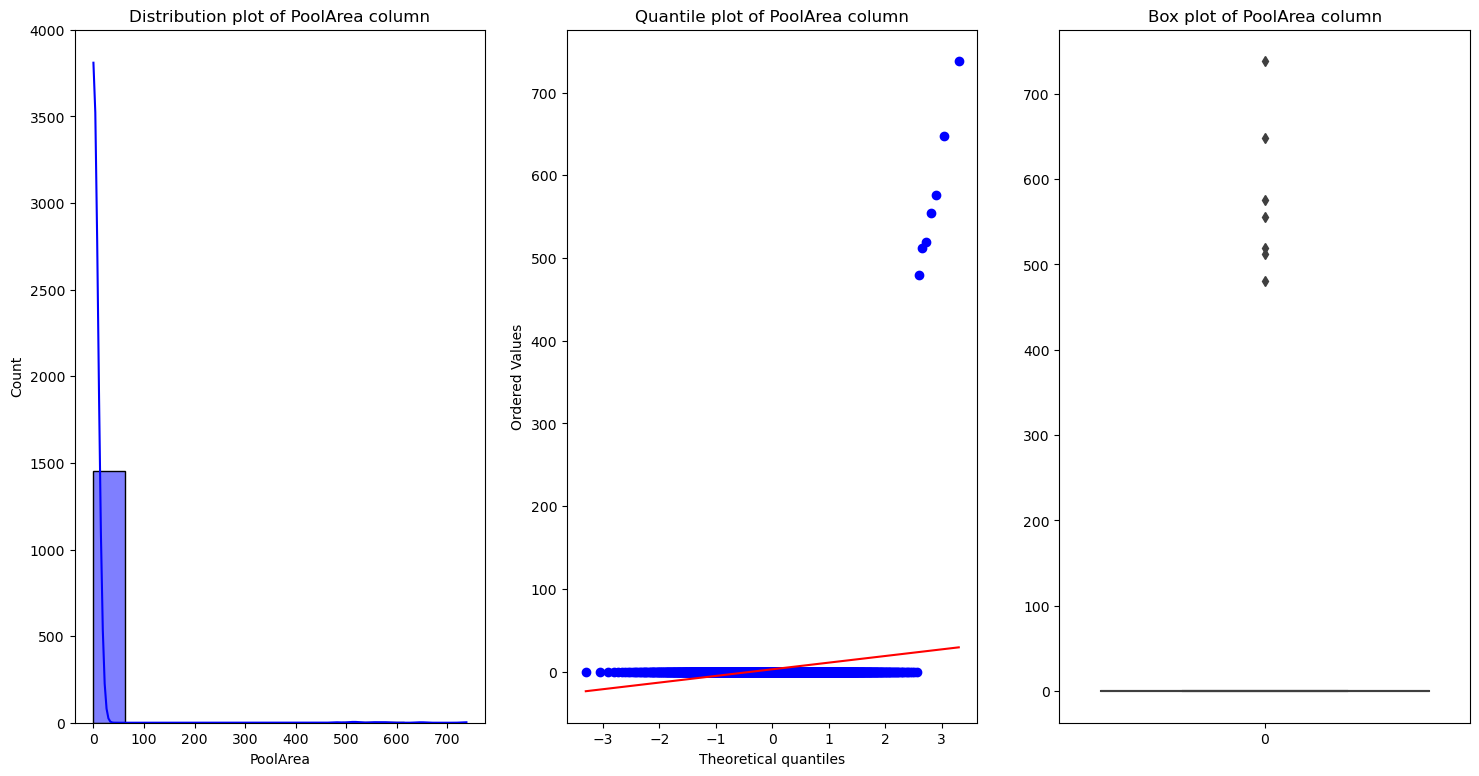

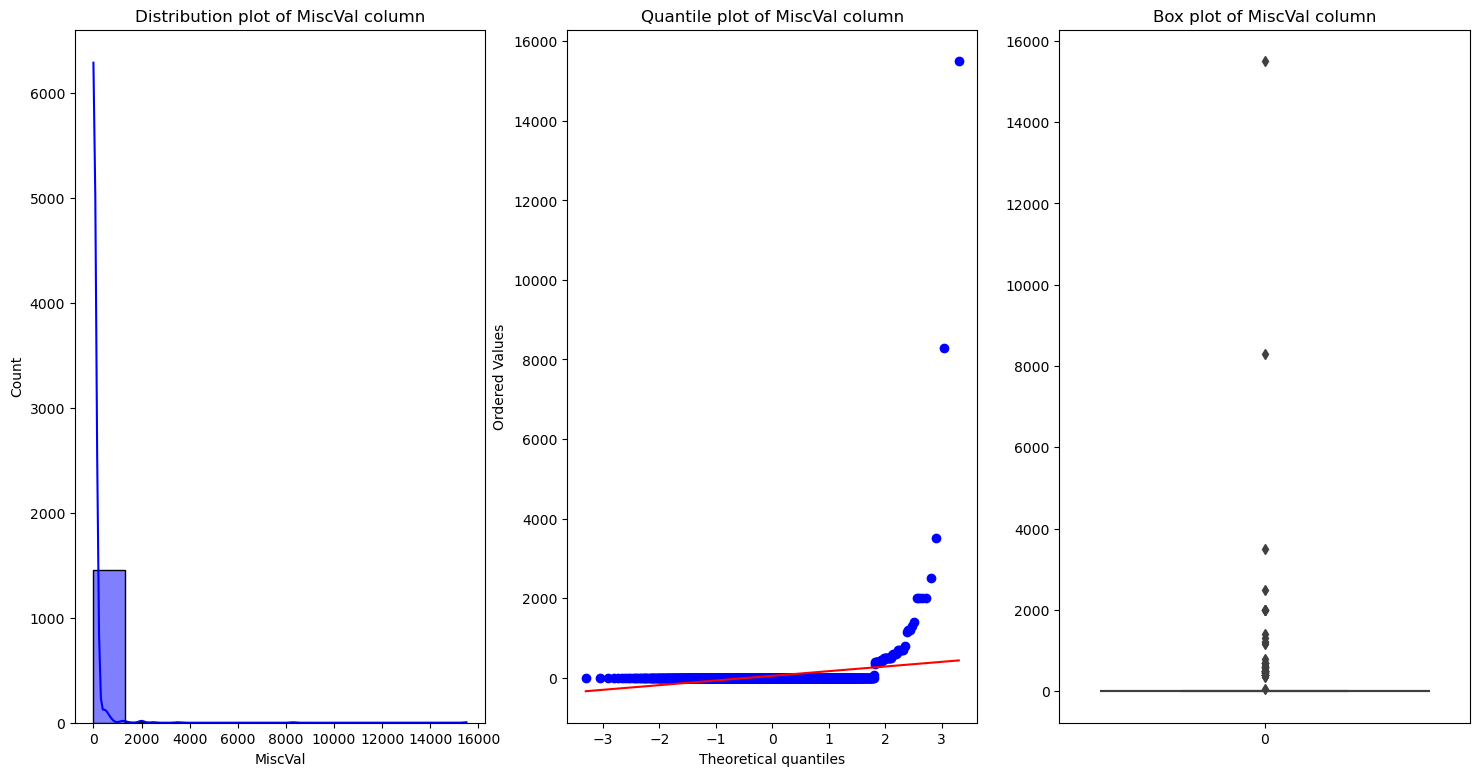

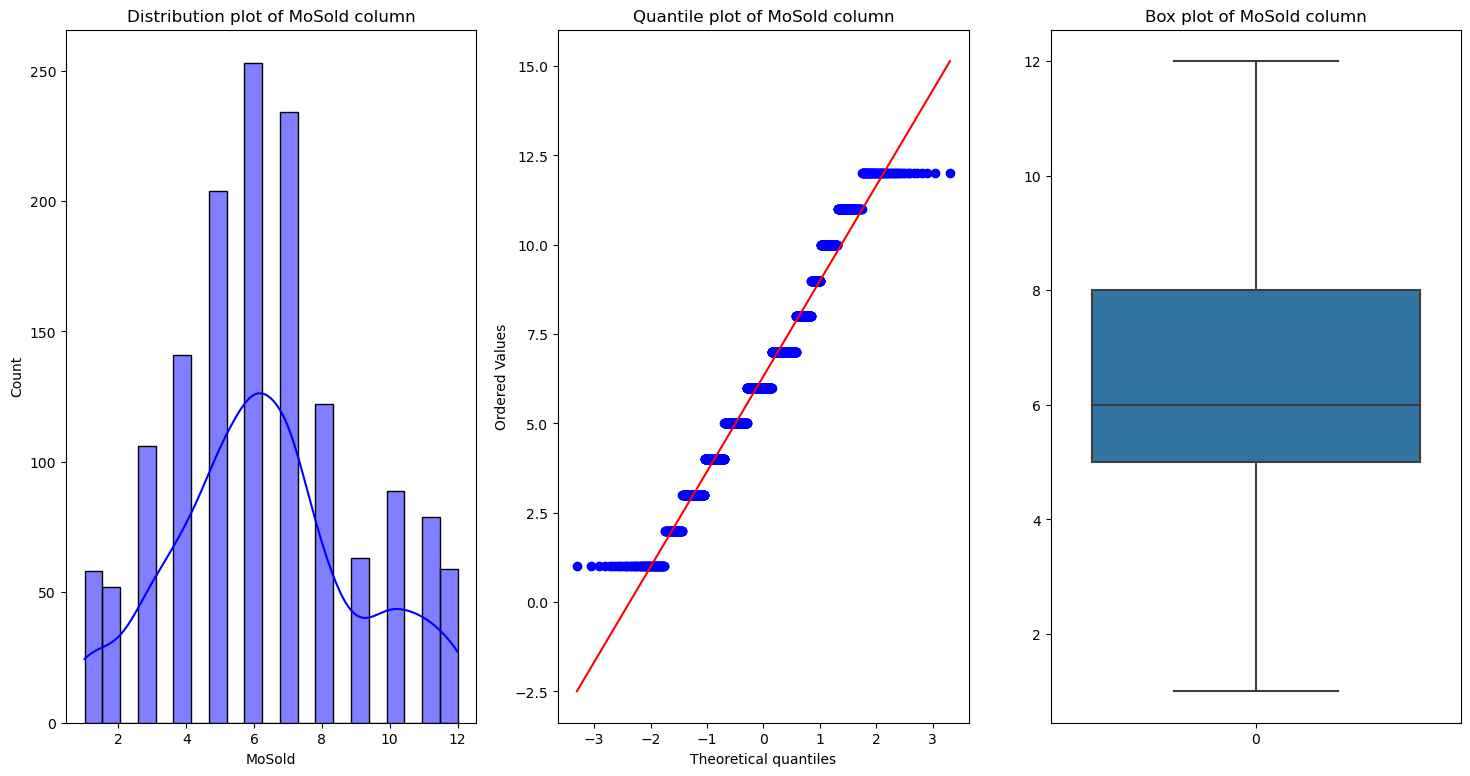

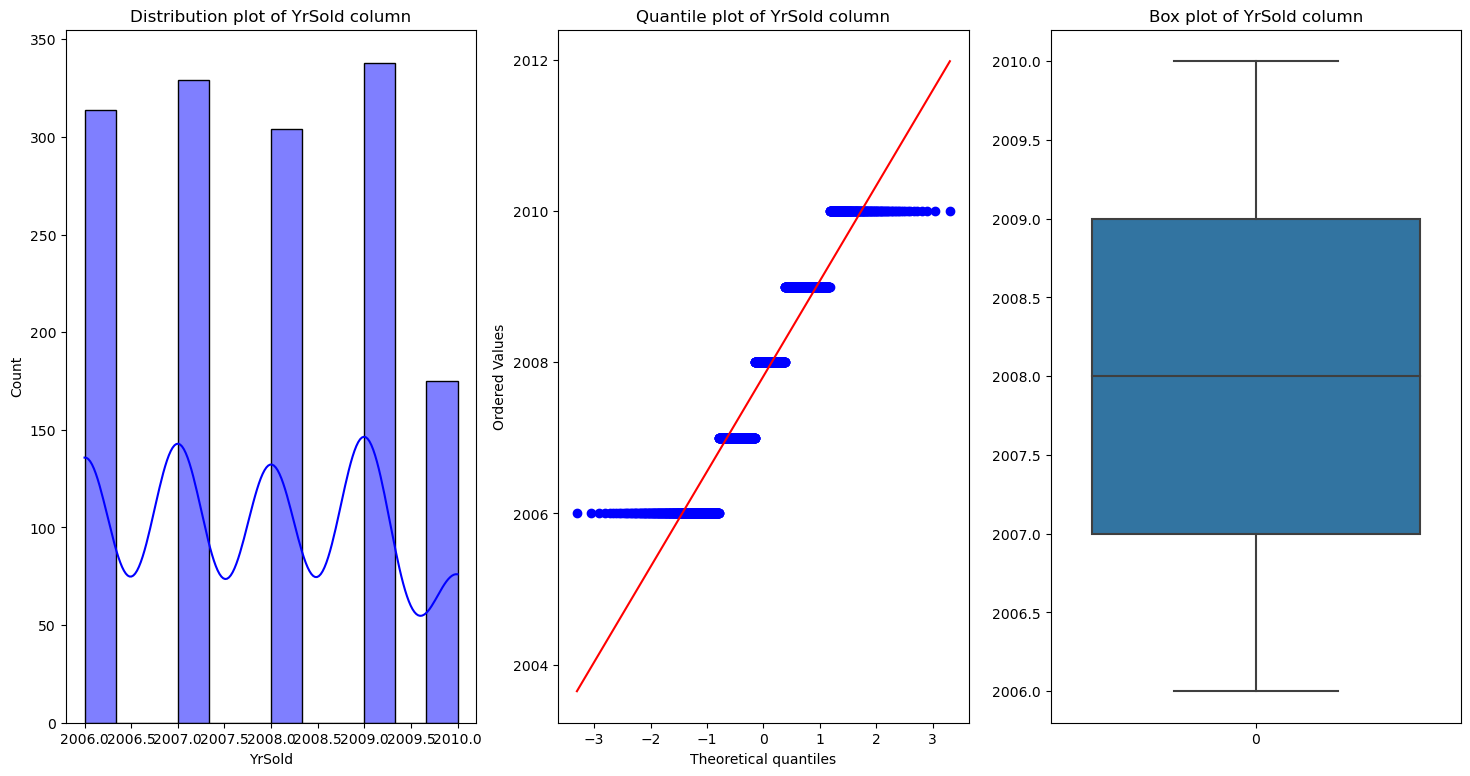

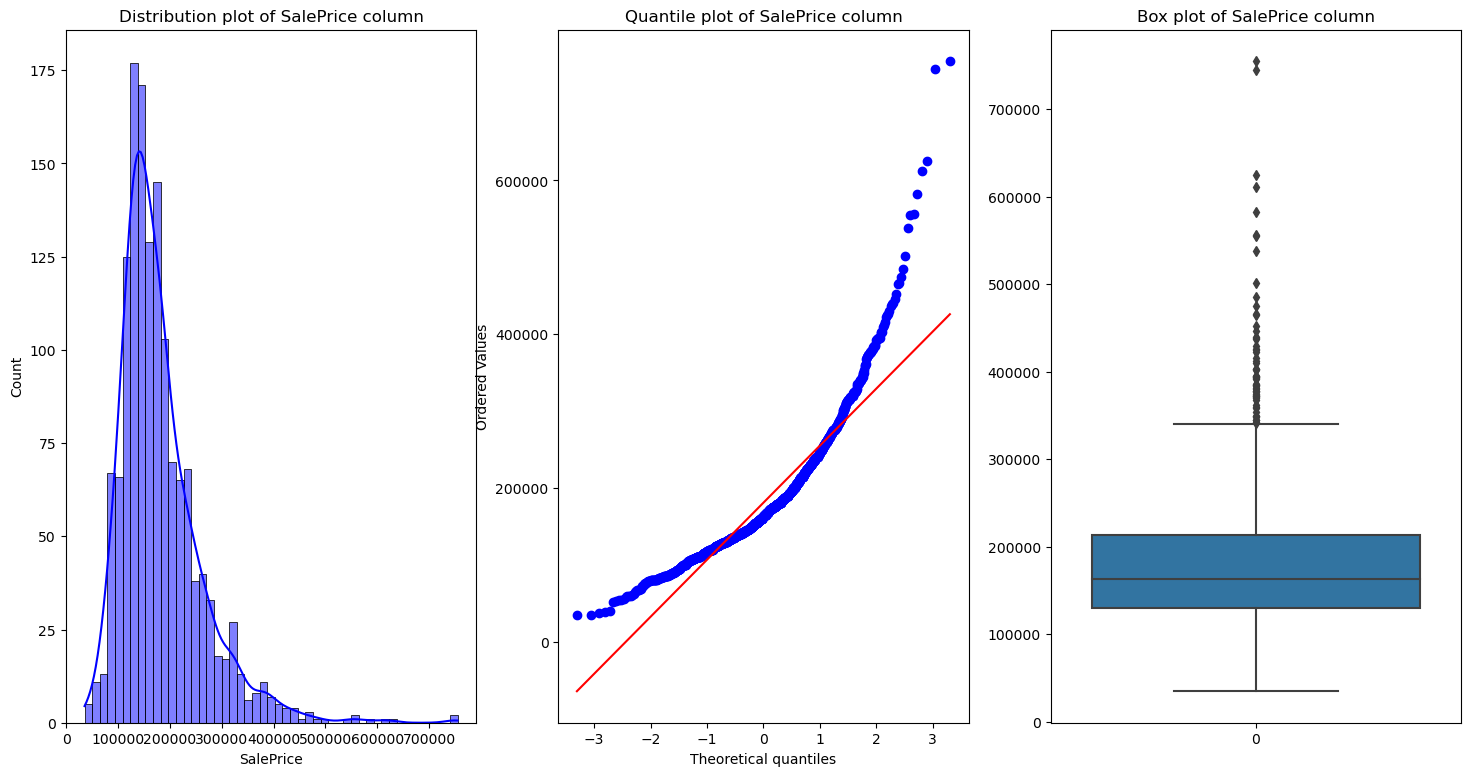

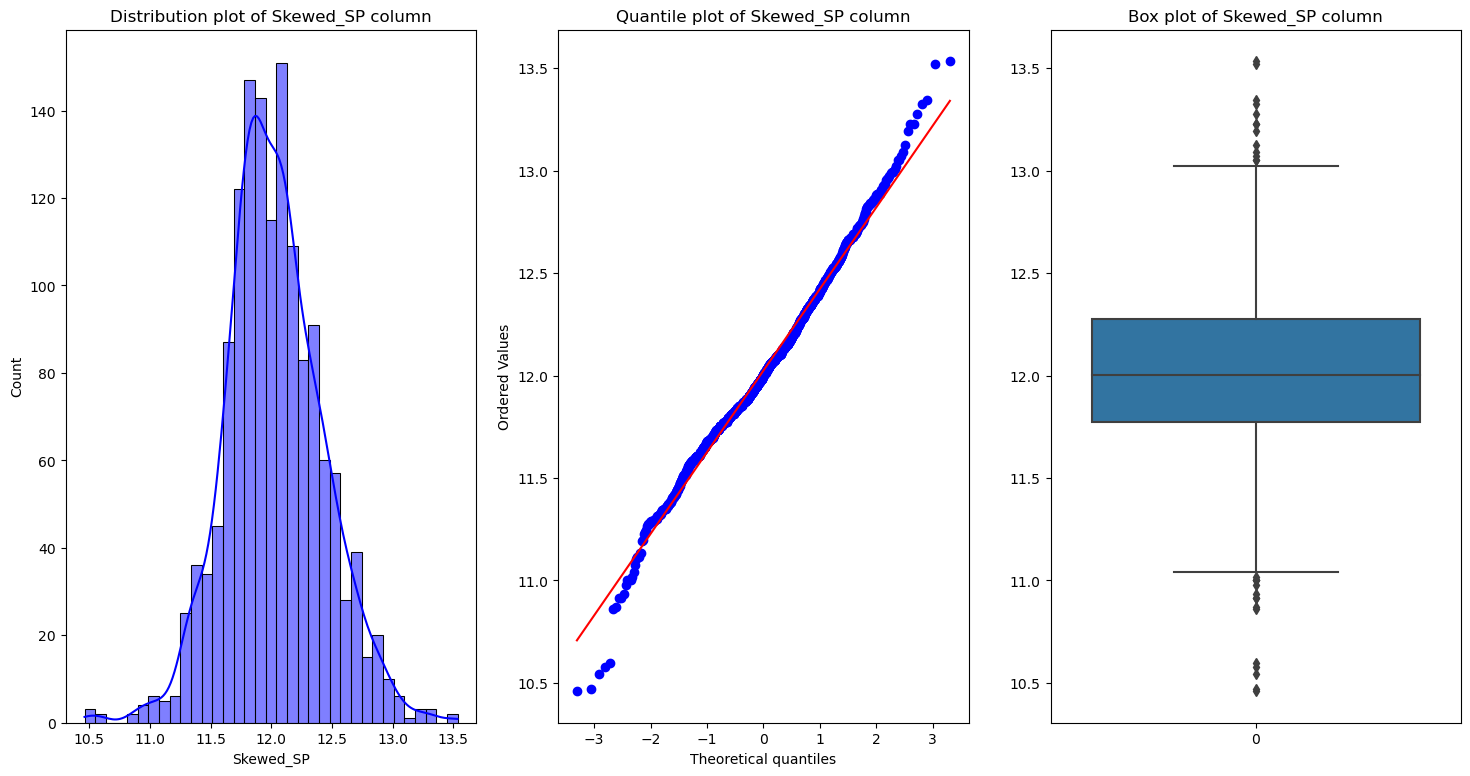

In [97]:
for i in num_col:
    plt.figure(figsize=(18,9))
    
    plt.subplot(131)
    sns.histplot(df[i],color='blue',kde=True)
    plt.title(f"Distribution plot of {i} column")
    
    plt.subplot(132)
    stat.probplot(df[i],dist='norm',plot=plt)
    plt.title(f"Quantile plot of {i} column")
    
    plt.subplot(133)
    sns.boxplot(df[i])
    plt.title(f"Box plot of {i} column")
    
    plt.show()

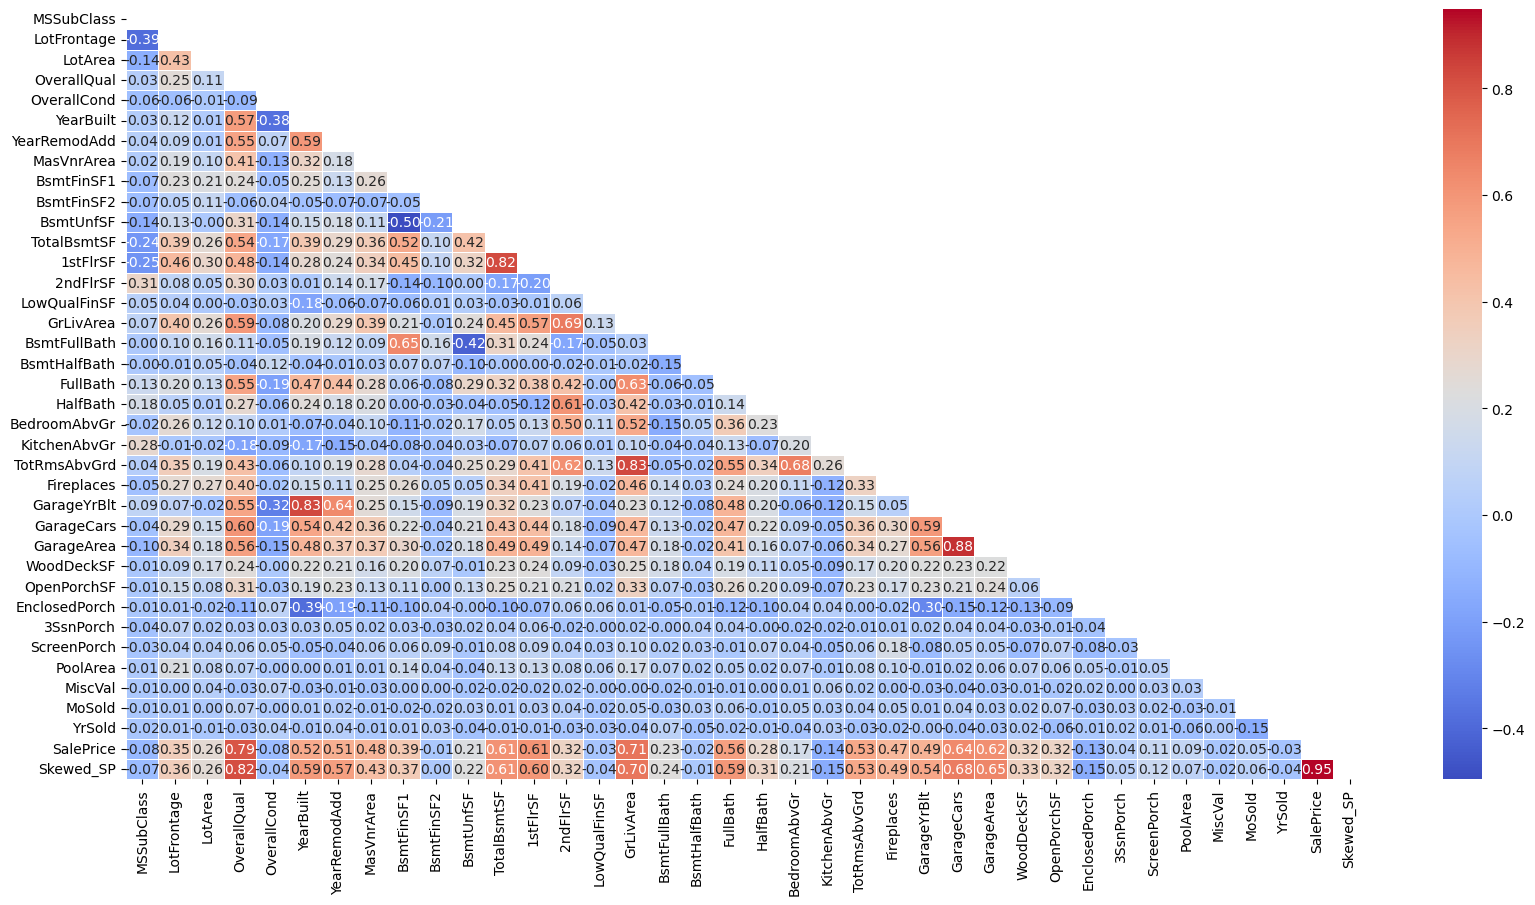

In [99]:
# Then we will try to find the corretation between the feature and target
corr = num_col.corr()
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.show()

We will analyze the features in their descending of correlation with sales price

In [100]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [101]:
#Creating a pivot table 
quality_pivot = df.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [102]:
quality_pivot

SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390

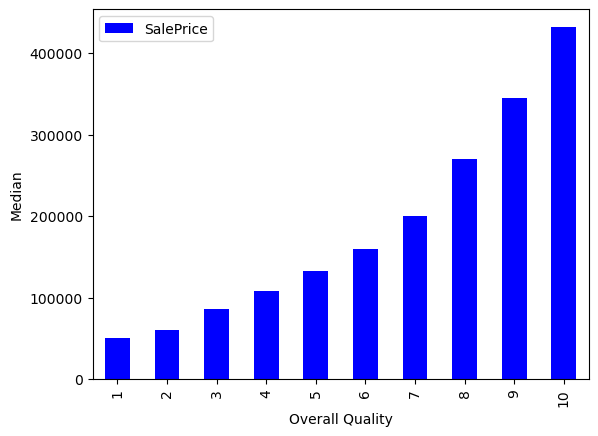

In [103]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.show()

SalePrice varies directly with the Overall quality

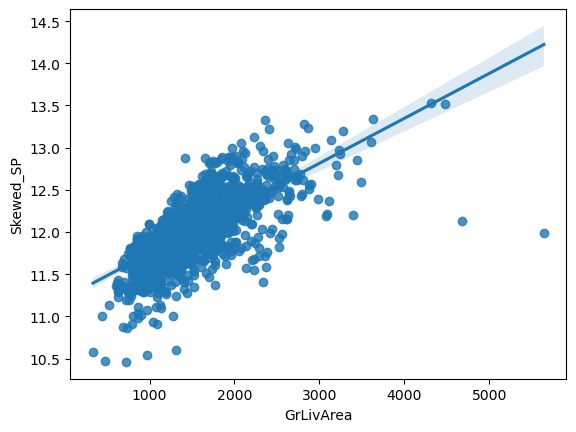

In [104]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)
plt.show()

SalePrice increases as the GrLivArea increases.  We will also get rid of the outliers which severely affect the prediction of the survival rate.

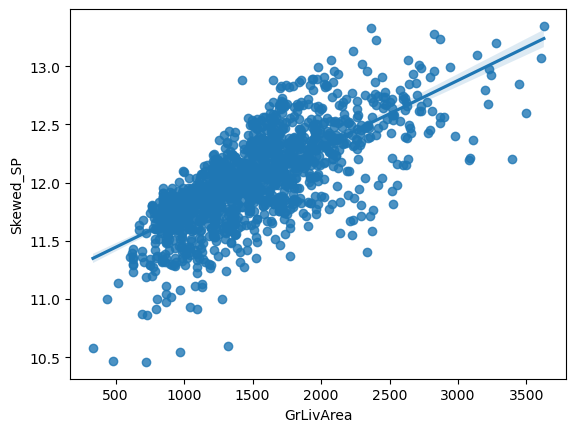

In [107]:
#Removing outliers
df = df[df['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)
plt.show()


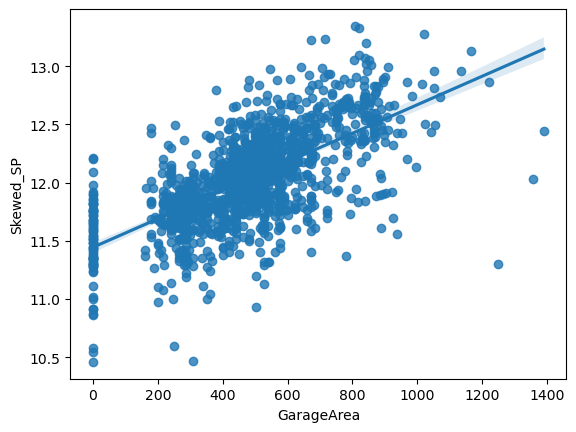

In [108]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)
plt.show()

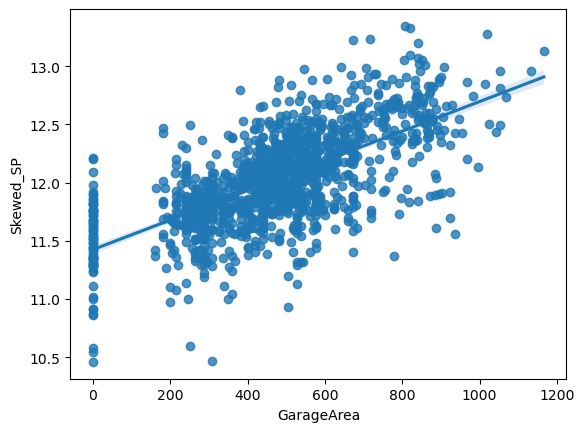

In [109]:
#Removing outliers
df = df[df['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)
plt.show()

In [110]:
#Removing the null values
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1447
MiscFeature         1399
Alley               1361
Fence               1172
MasVnrType           870
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageType            81
GarageFinish          81
GarageCond            81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtCond              37
BsmtQual              37
BsmtFinType1          37
MasVnrArea             8
Electrical             1
MSSubClass             0
Fireplaces             0
TotRmsAbvGrd           0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0

In [111]:
# Pool null value refers to no pool area
print ("Unique values are:", df['MiscFeature'].unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [112]:
#Analysing the non numeric data 
cat = df.select_dtypes([object])
cat.describe(include='all')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1452   1452    91     1452        1452      1452      1452   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1144   1447    50      921        1307      1451      1047   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1452         1452       1452  ...       1371         1371   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1375          225       1255  ...        865          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1371       1371       1452      5    280          53     1452   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Fa  MnPrv        Shed       WD   
freq         1303       1318       1332      2    156          48     1264   

       SaleCondition  
count           1452  
unique             6  
top           Normal  
freq            1195  

[4 rows x 43 columns]

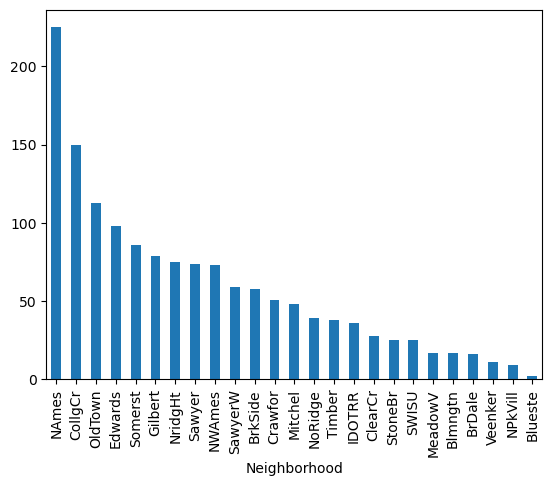

In [113]:
df['Neighborhood'].value_counts().plot(kind='bar')
plt.show()

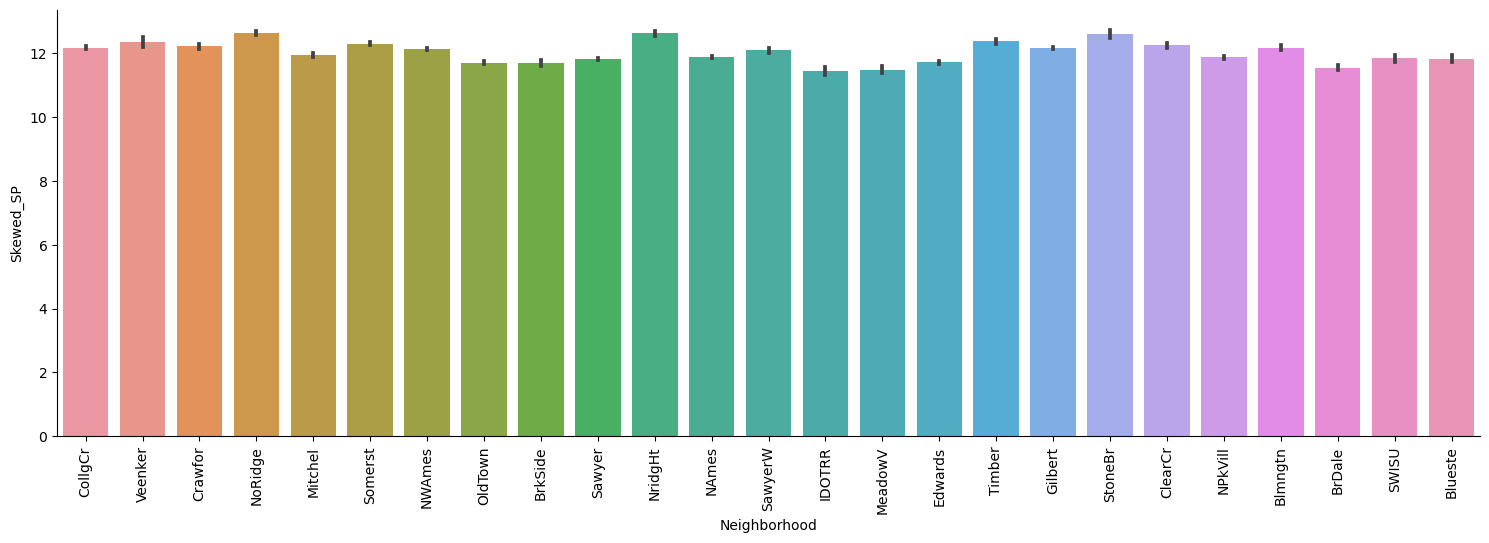

In [114]:
sns.catplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=3)
plt.xticks(rotation=90)
plt.show()

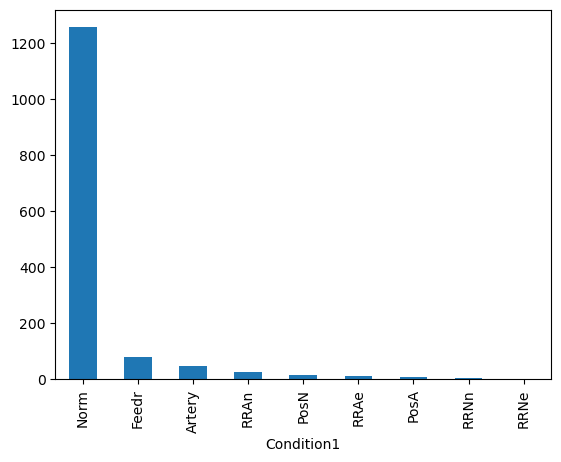

In [121]:
df['Condition1'].value_counts().plot(kind='bar')
plt.show()

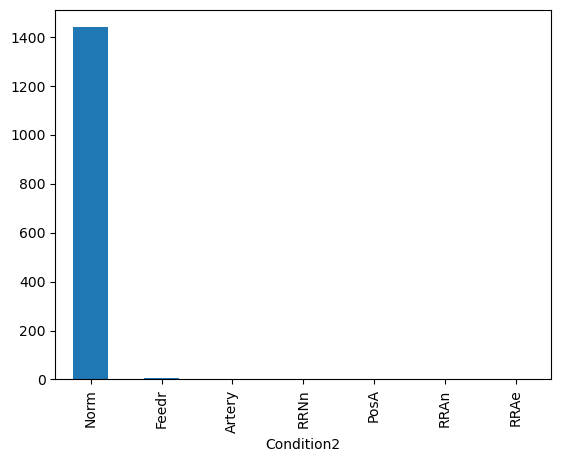

In [122]:
df['Condition2'].value_counts().plot(kind='bar')
plt.show()

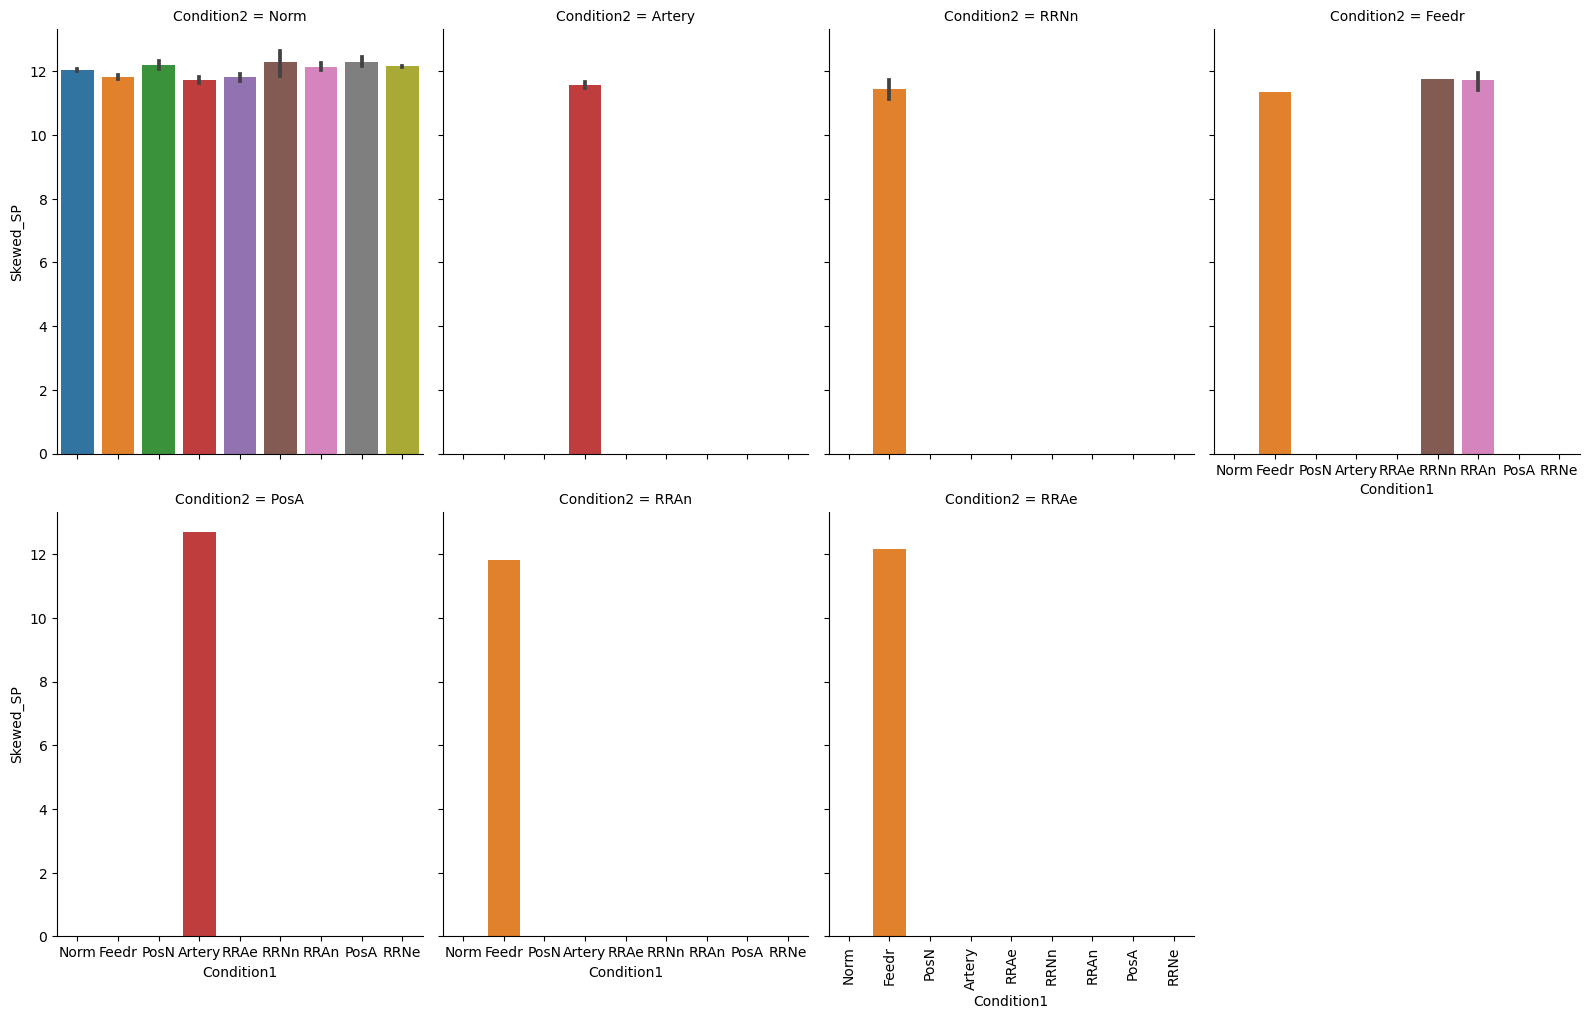

In [123]:
sns.catplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
plt.xticks(rotation=90)
plt.show()

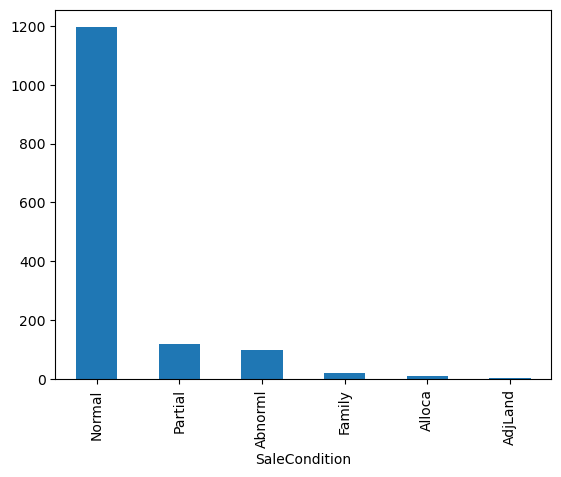

In [125]:
df['SaleCondition'].value_counts().plot(kind='bar')
plt.show()

In [126]:
df['SaleType'].value_counts()

SaleType
WD       1264
New       118
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

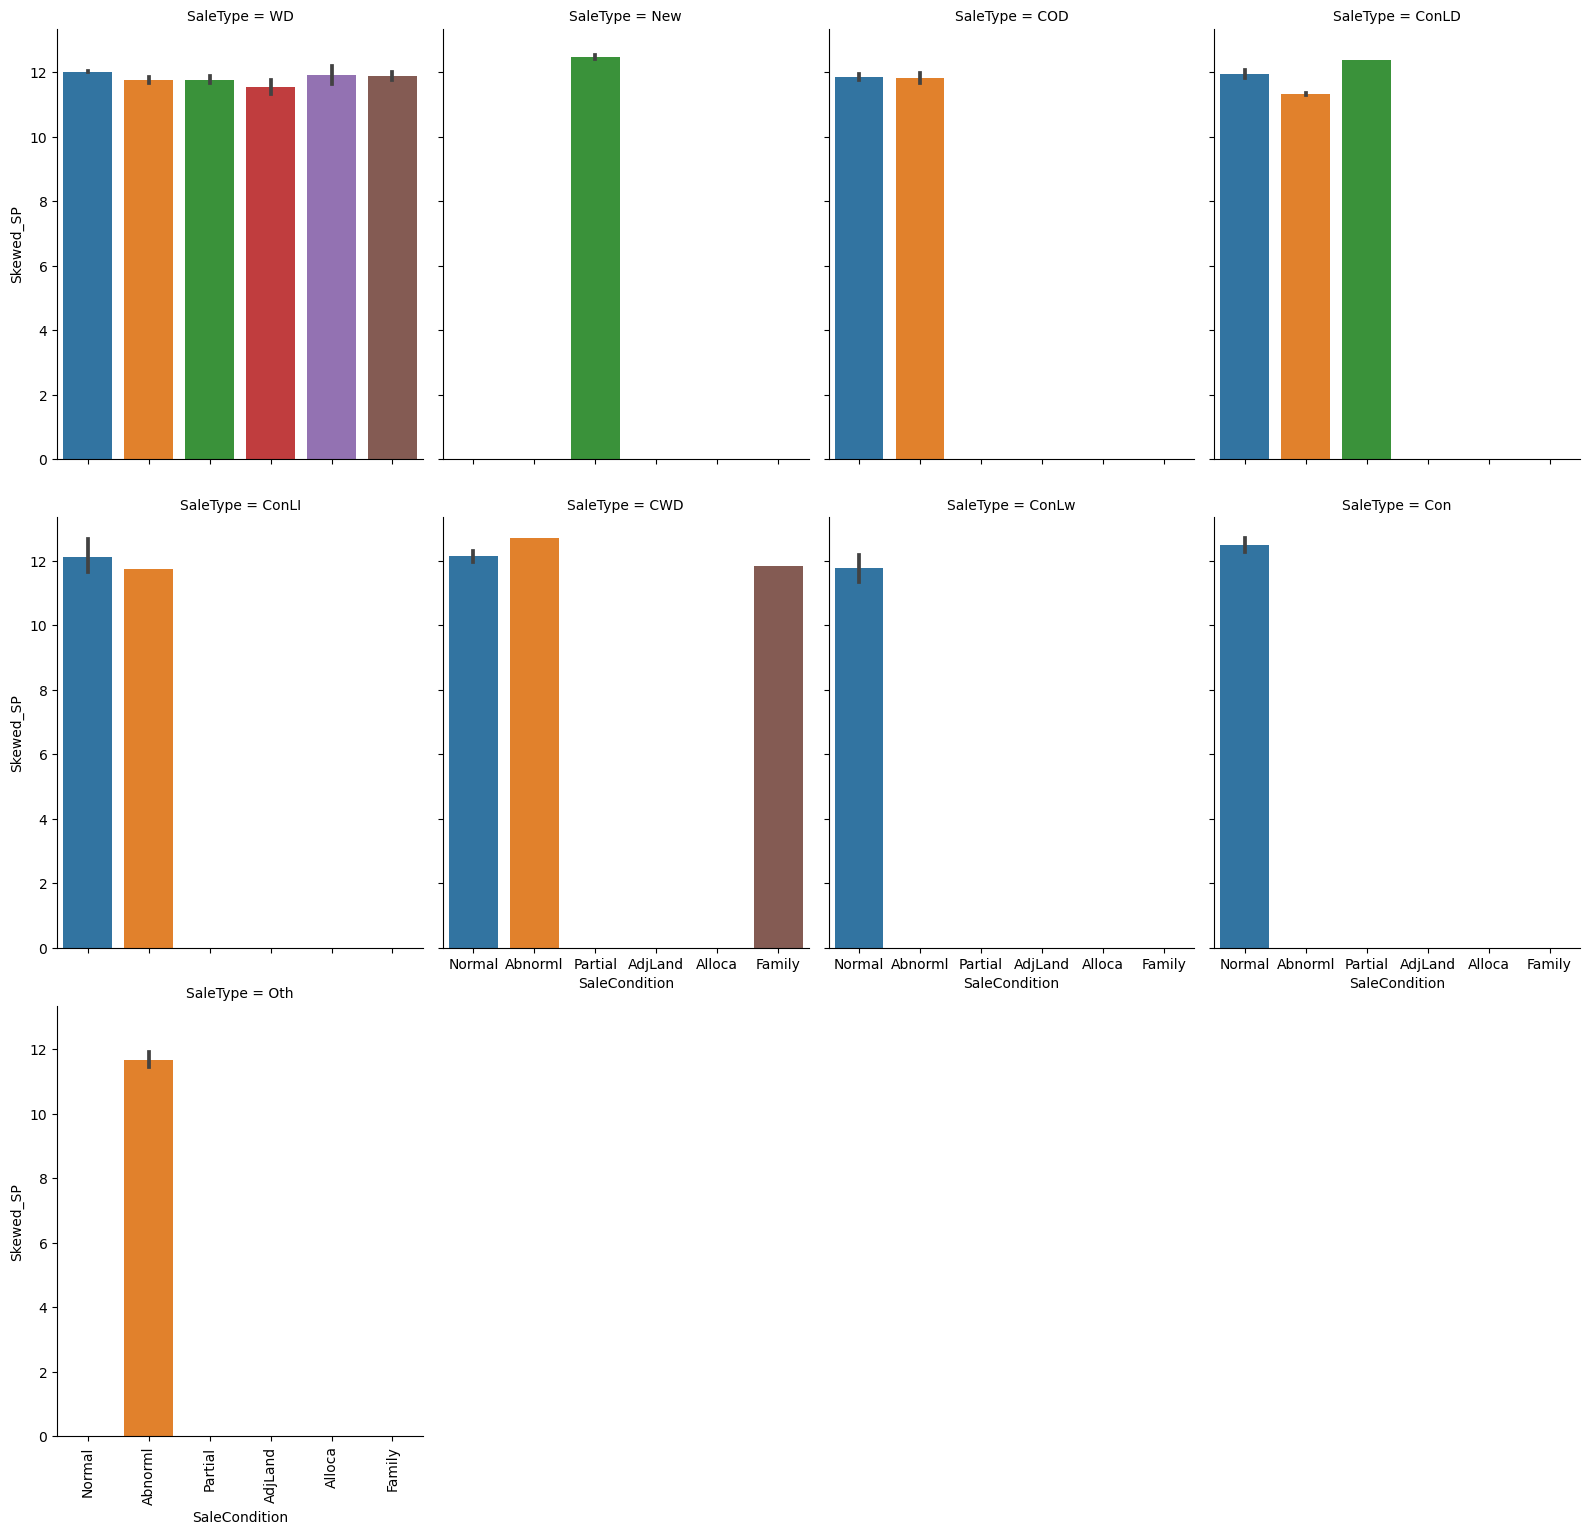

In [127]:
sns.catplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
plt.xticks(rotation=90)
plt.show()

In [129]:
#Data Trasformation 
print (df['Street'].value_counts(), "\n")

Street
Pave    1447
Grvl       5
Name: count, dtype: int64 



In [132]:
# Turn into one hot encoding 
df['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [133]:
# Encoded 
print ('Encoded: \n') 
print (df['enc_street'].value_counts())

Encoded: 

enc_street
True     1447
False       5
Name: count, dtype: int64


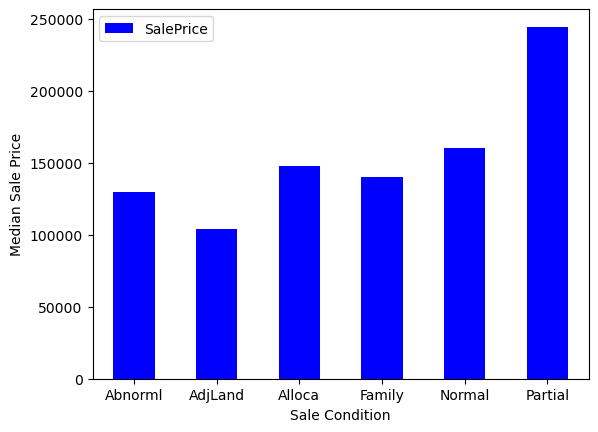

In [134]:
# Feature Engineering
condition_pivot = df.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [135]:
def encode(x):
    return 1 if x == 'Partial' else 0
df['enc_condition'] = train.SaleCondition.apply(encode)

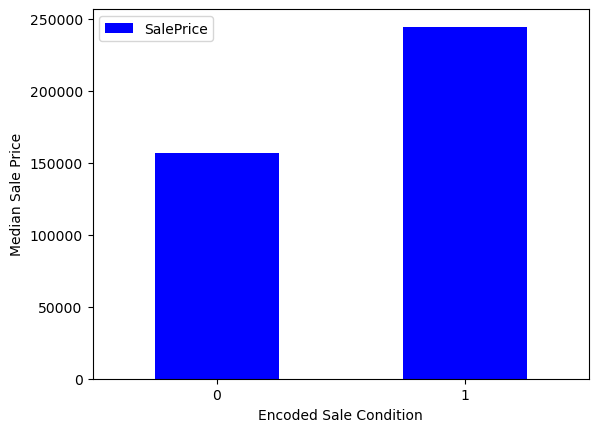

In [136]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [137]:
#Interpolation of data 
data = df.select_dtypes(include=[int,float]).interpolate().dropna()

In [138]:
data

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  EnclosedPorch  \
0             2003       196.0         706           0  ...              0   
1             1976         0.0         978           0  ...              0   
2             2002       162.0         486           0  ...              0   
3             1970         0.0         216           0  ...            272   
4             2000       350.0         655           0  ...              0   
...            ...         ...         ...         ...  ...            ...   
1455          2000         0.0           0           0  ...              0   
1456          1988       119.0         790         163  ...              0   
1457          2006         0.0         275           0  ...              0   
1458          1996         0.0          49        1029  ...            112   
1459          1965         0.0         830         290  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0             0            0         0        0       2    2008     208500   
1             0            0         0        0       5    2007     181500   
2             0            0         0        0       9    2008     223500   
3             0            0         0        0       2    2006     140000   
4             0            0         0        0      12    2008     250000   
...         ...          ...       ...      ...     ...     ...        ...   
1455          0            0         0        0       8    2007     175000   
1456          0            0         0        0       2    2010     210000   
1457          0            0         0     2500       5    2010     266500   
1458          0            0         0        0       4    2010     142125   
1459          0            0         0        0       6    2008     147500   

      Skewed_SP  enc_condition  
0     12.247699              0  
1     12.109016              0  
2     12.317171              0  
3     11.849405              0  
4     12.429220              0  
...         ...            ...  
1455  12.072547              0  
1456  12.254868              0  
1457  12.493133              0  
1458  11.864469              0  
1459  11.901590              0  

[1452 rows x 39 columns]

In [139]:
data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Skewed_SP        0
enc_condition    0
dtype: int64

In [141]:
# Linear Model for the  train and test
y = np.log(df['SalePrice'])
x = data.drop(['SalePrice'], axis=1)

In [142]:
x

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  OpenPorchSF  \
0             2003       196.0         706           0  ...           61   
1             1976         0.0         978           0  ...            0   
2             2002       162.0         486           0  ...           42   
3             1970         0.0         216           0  ...           35   
4             2000       350.0         655           0  ...           84   
...            ...         ...         ...         ...  ...          ...   
1455          2000         0.0           0           0  ...           40   
1456          1988       119.0         790         163  ...            0   
1457          2006         0.0         275           0  ...           60   
1458          1996         0.0          49        1029  ...            0   
1459          1965         0.0         830         290  ...           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0          0            0         0        0      12   
...             ...        ...          ...       ...      ...     ...   
1455              0          0            0         0        0       8   
1456              0          0            0         0        0       2   
1457              0          0            0         0     2500       5   
1458            112          0            0         0        0       4   
1459              0          0            0         0        0       6   

      YrSold  Skewed_SP  enc_condition  
0       2008  12.247699              0  
1       2007  12.109016              0  
2       2008  12.317171              0  
3       2006  11.849405              0  
4       2008  12.429220              0  
...      ...        ...            ...  
1455    2007  12.072547              0  
1456    2010  12.254868              0  
1457    2010  12.493133              0  
1458    2010  11.864469              0  
1459    2008  11.901590              0  

[1452 rows x 38 columns]

In [164]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [165]:
x_train,x_test,y_train,y_test = train_test_split(
                                    x,y, random_state=42, test_size=0.2)

In [166]:
x_train.shape,x_test.shape

((1161, 38), (291, 38))

In [189]:
scaler=StandardScaler()
x_train_tran=scaler.fit_transform(x_train)
x_test_tran=scaler.transform(x_test)

In [190]:
x_train_tran

array([[-0.16564273,  0.39893673,  0.07191824, ..., -0.61049325,
        -0.37893283, -0.30700278],
       [ 0.06845491, -0.51002051,  0.063072  , ...,  0.13795729,
         1.09909462, -0.30700278],
       [ 0.06845491,  0.01621789, -0.20513865, ...,  1.63485839,
         0.06282517, -0.30700278],
       ...,
       [ 0.06845491,  1.06869469, -0.04327117, ..., -1.3589438 ,
         1.42066239, -0.30700278],
       [-0.86793563,  0.1118976 , -0.18255249, ...,  0.13795729,
         1.04509004,  3.25729949],
       [-0.86793563, -0.31866109,  0.01244136, ..., -0.61049325,
        -1.48904798, -0.30700278]])

In [167]:
rf =RandomForestRegressor()
lr =LinearRegression()
gb =GradientBoostingRegressor()
xgb=XGBRegressor()

In [259]:
def model_evaluation(name,model):
    model.fit(x_train,y_train)
    print(f"Model : '{name}'")
    print ("R^2 is:", model.score(x_test,y_test))
    y_pred=model.predict(x_test)
    print ('MSE is:', mean_squared_error(y_test,y_pred))
    print ('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Cross Validation Score:', np.mean (cross_val_score(model,x_train,y_train,scoring='r2',cv=5,n_jobs=-1)))
    
    # actual vs predicted
    
    plt.figure(figsize=(8,6))
    plt.scatter(y_test,y_pred,alpha=.75,color='blue')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title(f"{name} Model")
    plt.show()

Model : 'Linear Regression'
R^2 is: 0.9999999999946964
MSE is: 9.312555631742221e-13
RMSE is: 9.650158357116333e-07
Cross Validation Score: 0.9999999999957708


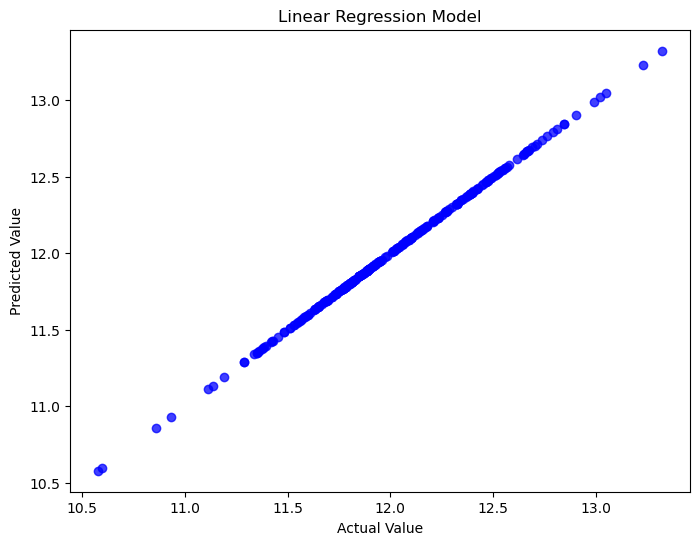

In [260]:
model_evaluation('Linear Regression',lr)


Model : 'Random Forest'
R^2 is: 0.999502448096361
MSE is: 8.736384750965846e-05
RMSE is: 0.009346862976938224
Cross Validation Score: 0.9977706418251987


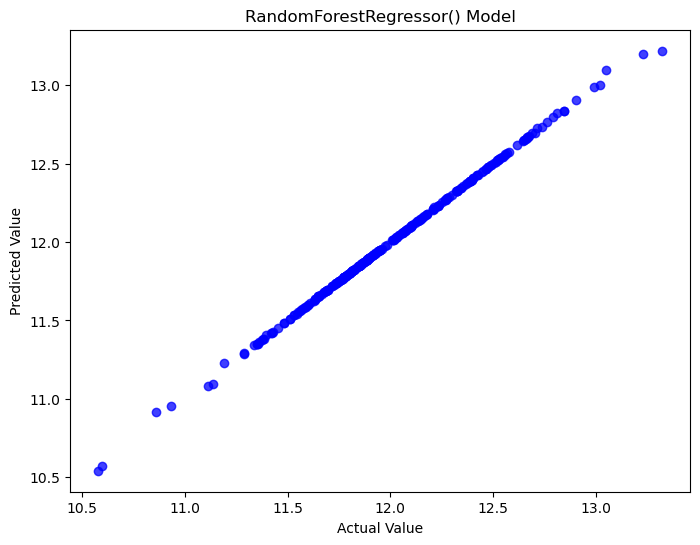

In [177]:
model_evaluation('Random Forest',rf)

Model : 'Gradient Boosting'
R^2 is: 0.9997835515493321
MSE is: 3.800562172419317e-05
RMSE is: 0.006164869968149626
Cross Validation Score: 0.9996456708061461


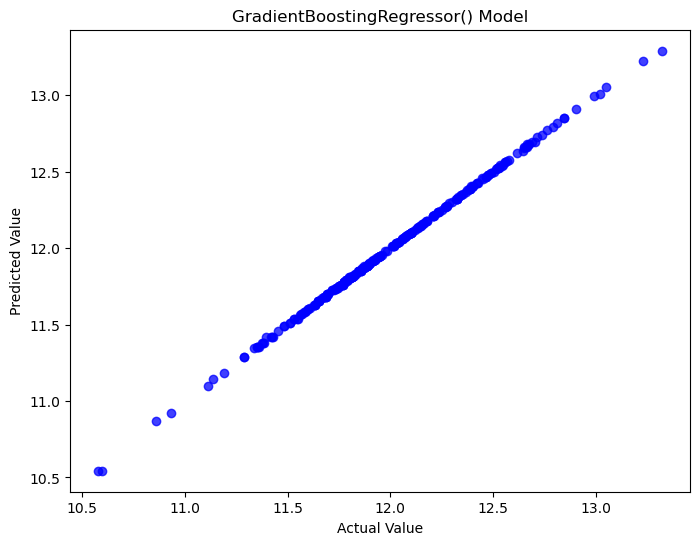

In [178]:
model_evaluation('Gradient Boosting',gb)

Model : 'XGBoost'
R^2 is: 0.9960580307188373
MSE is: 0.0006921601558520565
RMSE is: 0.026308936805809095
Cross Validation Score: 0.9959537767178199


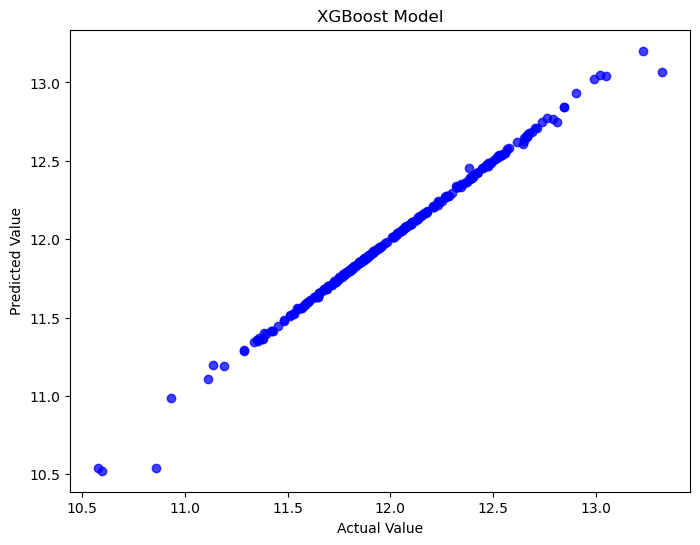

In [181]:
model_evaluation('XGBoost',xgb)

# Prediction Using Artificial Neural Network

In [248]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [249]:
model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_tran.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [250]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse',metrics=['r2_score'])

In [252]:
call_back=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=40,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [253]:
history=model.fit(x_train_tran,y_train,epochs=500,validation_data=(x_test_tran,y_test),callbacks=call_back)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 122.2699 - r2_score: -904.6980 - val_loss: 42.8513 - val_r2_score: -243.0373
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.9609 - r2_score: -179.5301 - val_loss: 8.9954 - val_r2_score: -50.2289
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.8411 - r2_score: -95.1636 - val_loss: 6.1244 - val_r2_score: -33.8783
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9588 - r2_score: -63.6169 - val_loss: 4.3727 - val_r2_score: -23.9026
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3080 - r2_score: -43.2324 - val_loss: 3.5296 - val_r2_score: -19.1008
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2713 - r2_score: -42.5968 - val_loss: 3.0661 - val_r2_score: -16.4612
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7165 - r2_score: -39.0649 - val_loss: 3.0521 - val_r2_score: -16.3818
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0845 - r2_sco

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6573 - r2_score: -3.0729 - val_loss: 0.8590 - val_r2_score: -3.8921
Epoch 101/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6523 - r2_score: -3.7865 - val_loss: 0.4738 - val_r2_score: -1.6980
Epoch 102/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7066 - r2_score: -3.5401 - val_loss: 0.6172 - val_r2_score: -2.5148
Epoch 103/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6025 - r2_score: -3.3171 - val_loss: 0.4503 - val_r2_score: -1.5646
Epoch 104/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6944 - r2_score: -3.8117 - val_loss: 0.3778 - val_r2_score: -1.1515
Epoch 105/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6131 - r2_score: -2.9452 - val_loss: 0.5708 - val_r2_score: -2.2506
Epoch 106/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6311 - r2_score: -3.1537 - val_loss: 0.7450 - val_r2_score: -3.2429
Epoch 107/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6209 - r2_score: -3.4996 - val_los

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0819 - r2_score: 0.4485 - val_loss: 0.0707 - val_r2_score: 0.5972
Epoch 200/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0664 - r2_score: 0.5263 - val_loss: 0.0800 - val_r2_score: 0.5446
Epoch 201/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0684 - r2_score: 0.5392 - val_loss: 0.0781 - val_r2_score: 0.5550
Epoch 202/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604 - r2_score: 0.5943 - val_loss: 0.0674 - val_r2_score: 0.6159
Epoch 203/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - r2_score: 0.5045 - val_loss: 0.0431 - val_r2_score: 0.7545
Epoch 204/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0651 - r2_score: 0.5629 - val_loss: 0.0425 - val_r2_score: 0.7579
Epoch 205/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0602 - r2_score: 0.5768 - val_loss: 0.1069 - val_r2_score: 0.3909
Epoch 206/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0651 - r2_score: 0.5794 - val_loss: 0.0376 - val

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - r2_score: 0.8950 - val_loss: 0.0110 - val_r2_score: 0.9375
Epoch 300/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - r2_score: 0.9259 - val_loss: 0.0063 - val_r2_score: 0.9642
Epoch 301/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - r2_score: 0.9213 - val_loss: 0.0052 - val_r2_score: 0.9701
Epoch 302/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - r2_score: 0.9258 - val_loss: 0.0138 - val_r2_score: 0.9214
Epoch 303/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - r2_score: 0.9237 - val_loss: 0.0054 - val_r2_score: 0.9692
Epoch 304/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - r2_score: 0.9270 - val_loss: 0.0036 - val_r2_score: 0.9796
Epoch 305/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - r2_score: 0.9261 - val_loss: 0.0210 - val_r2_score: 0.8807
Epoch 306/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - r2_score: 0.8973 - val_loss: 0.0035 - val

In [254]:
history.history

{'loss': [99.04027557373047,
  20.621686935424805,
  12.90245246887207,
  8.940240859985352,
  6.306308746337891,
  6.126119613647461,
  6.310317516326904,
  5.270053386688232,
  4.948648929595947,
  4.611292839050293,
  4.508081912994385,
  4.184060096740723,
  4.221531867980957,
  4.233234405517578,
  3.9001386165618896,
  3.5364465713500977,
  3.5525190830230713,
  3.7451765537261963,
  3.166260242462158,
  3.3859589099884033,
  3.3237996101379395,
  3.0833795070648193,
  2.899852991104126,
  2.9478538036346436,
  2.787034273147583,
  2.6994168758392334,
  2.800236940383911,
  2.5869593620300293,
  2.5480263233184814,
  2.779381513595581,
  2.557574987411499,
  2.5696423053741455,
  2.3969810009002686,
  2.2432568073272705,
  2.2149407863616943,
  2.3092992305755615,
  2.1179614067077637,
  2.2642910480499268,
  2.131592035293579,
  2.150092124938965,
  2.096975564956665,
  1.9452131986618042,
  1.8665002584457397,
  1.9183512926101685,
  1.9695898294448853,
  1.7581679821014404,
  

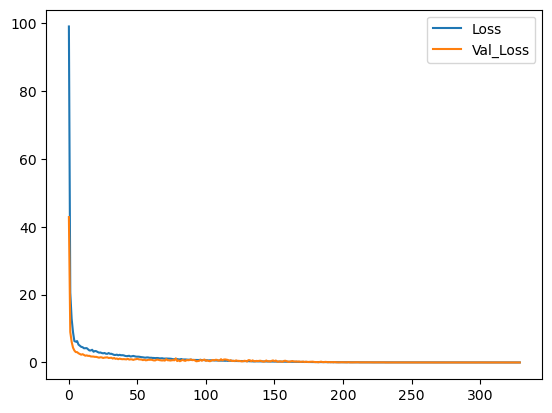

In [255]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.show()

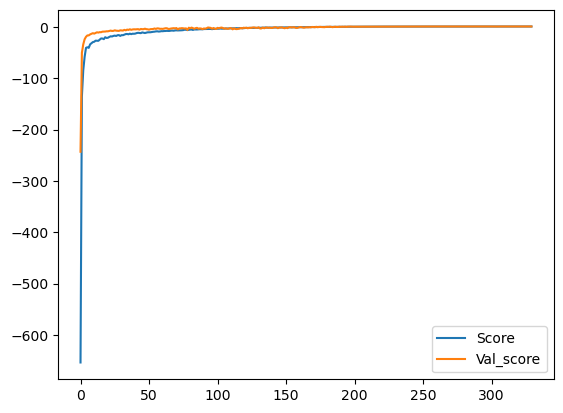

In [256]:
plt.plot(history.history['r2_score'],label='Score')
plt.plot(history.history['val_r2_score'],label='Val_score')
plt.legend()
plt.show()